<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [496]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [497]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [498]:
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

In [499]:
data_raw = pd.read_csv(path)

In [500]:
df = data_raw.copy()

### Dataset First View

In [501]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [502]:
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [503]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [504]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [505]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    3390
dtype: int64

#### Missing Values/Null Values

In [506]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [507]:
pip install missingno

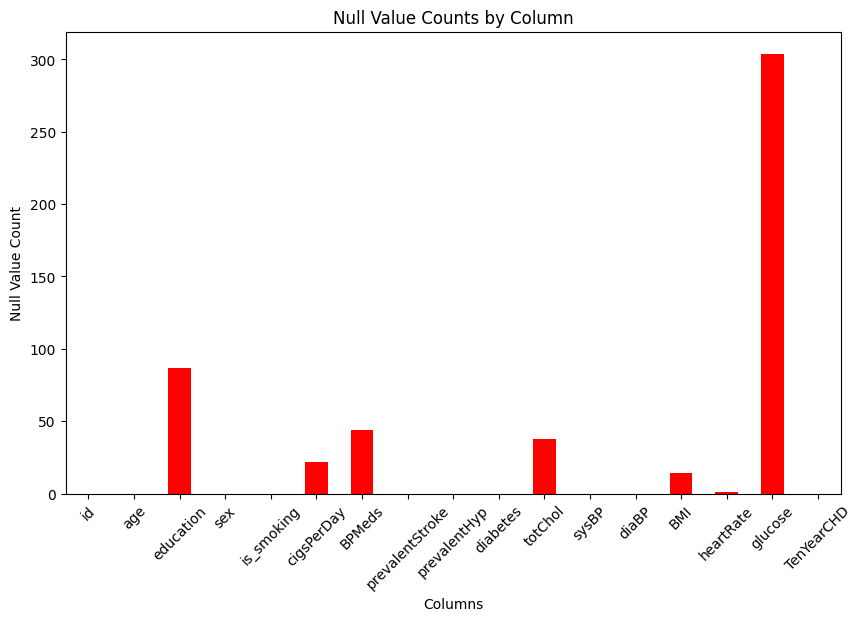

In [508]:
# Visualizing the missing values
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of null values in each column
null_counts = df.isnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
null_counts.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()

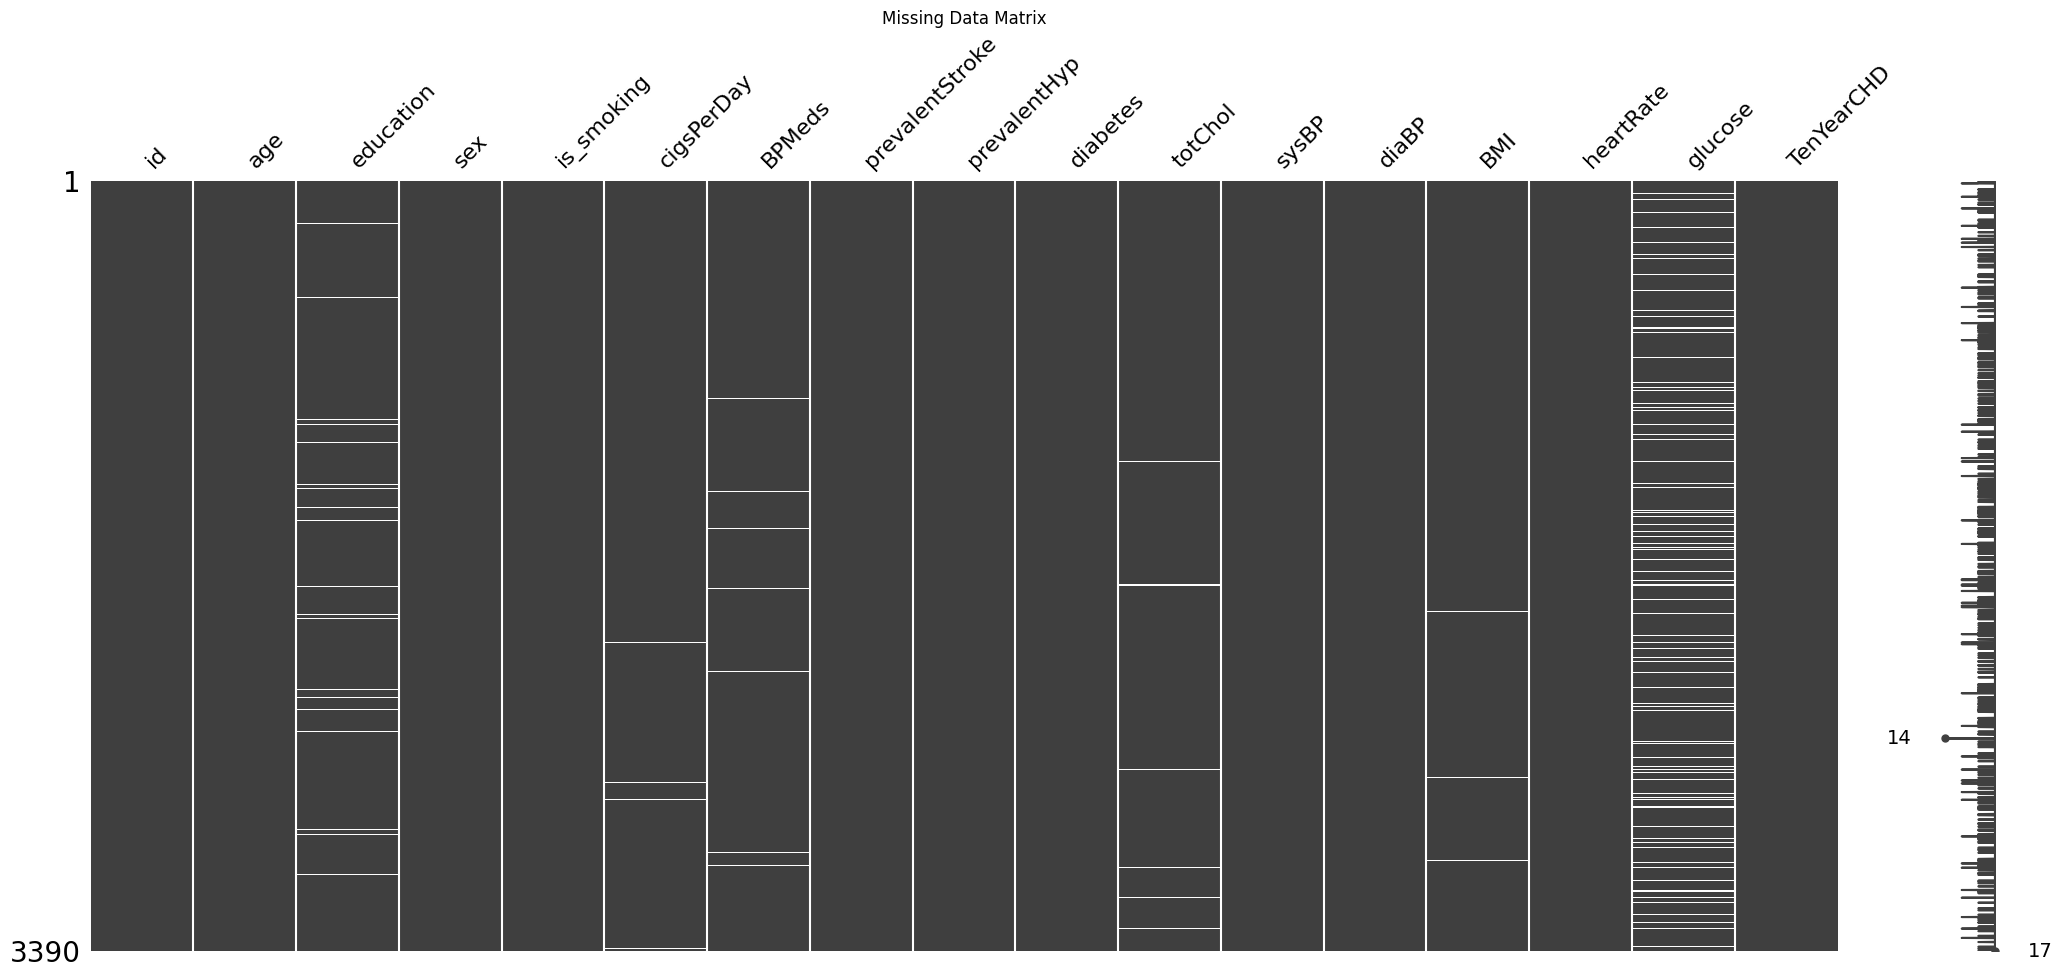

In [509]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt

# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [510]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [511]:
# Dataset Describe
df.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [512]:
# Check Unique Values for each variable.
import pandas as pd

# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [513]:
# Write your code to make your dataset analysis ready.
# Drop the 'education' column
df = df.drop('id', axis=1)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

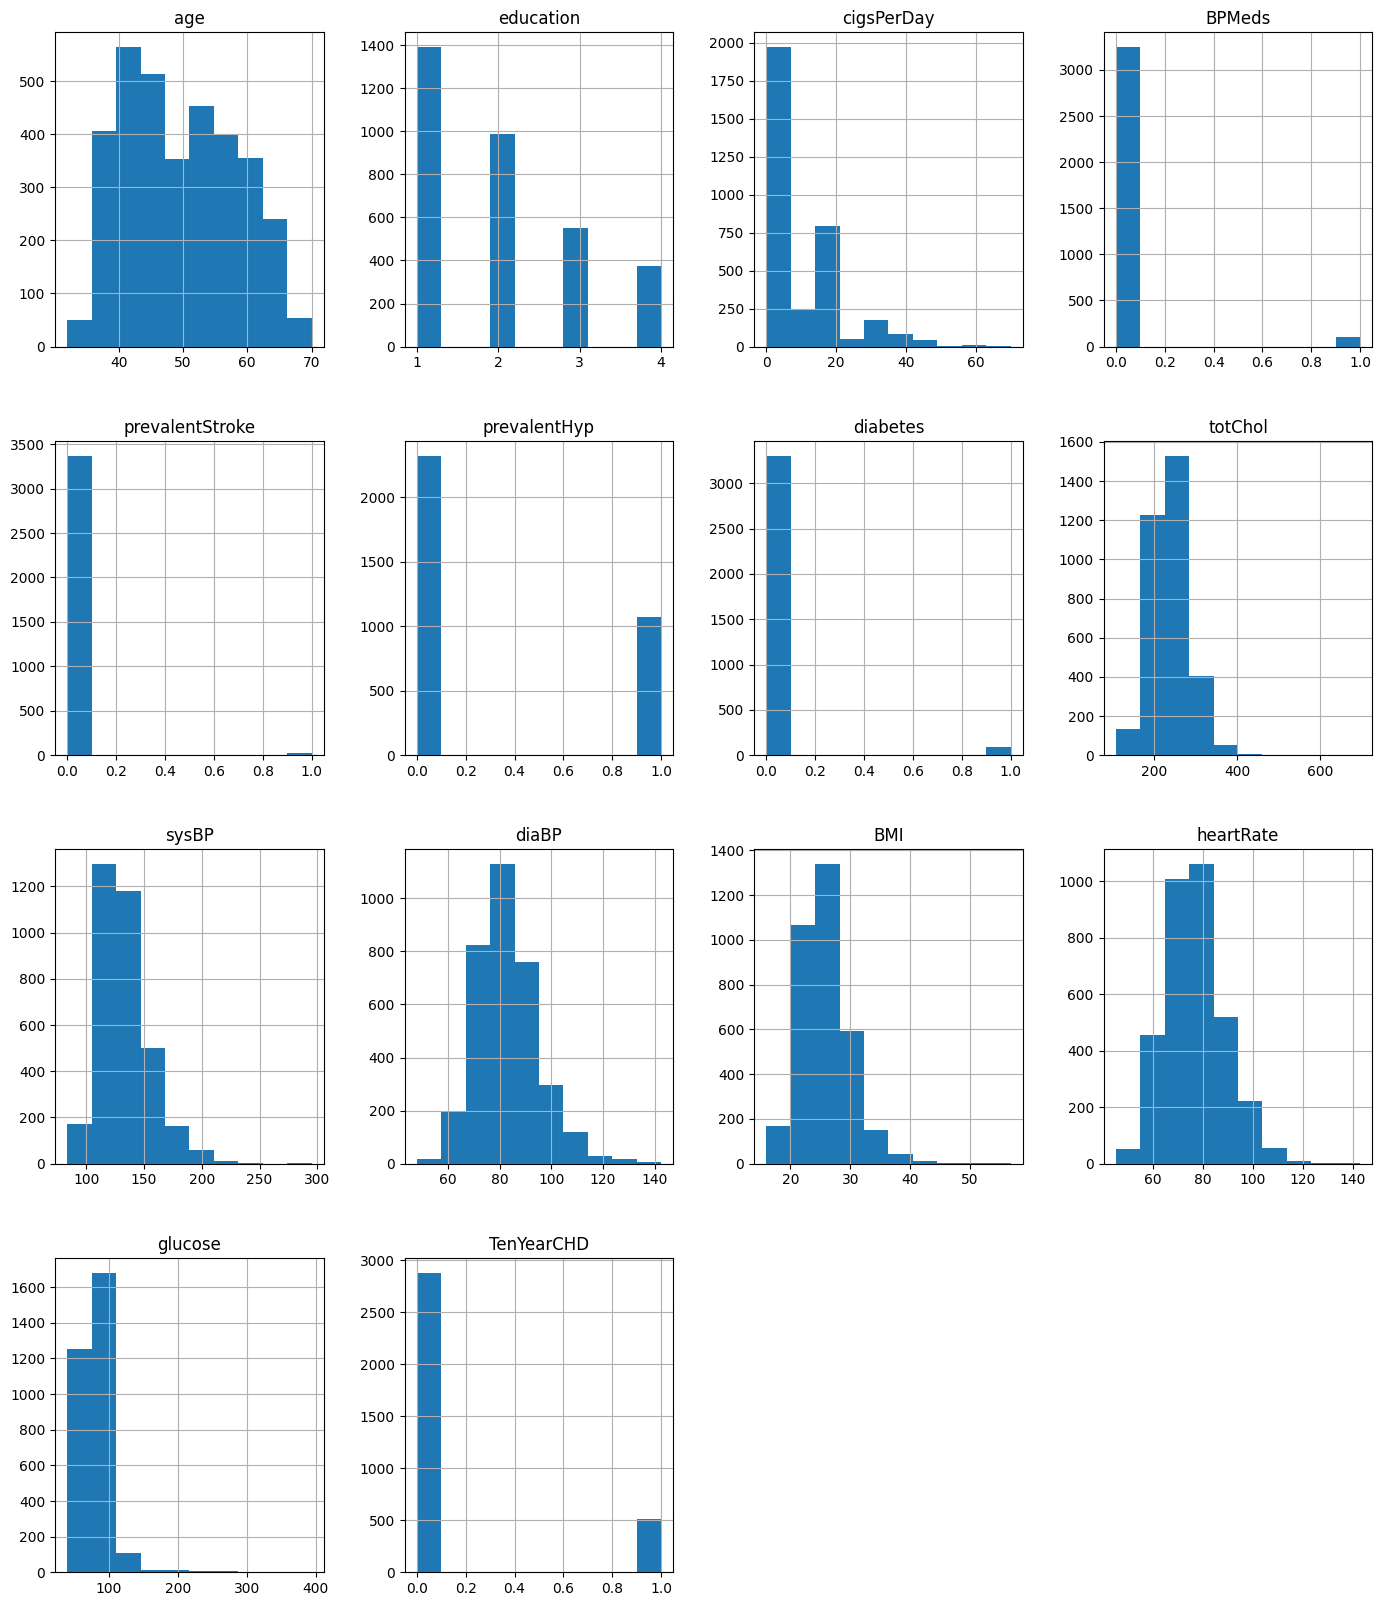

In [514]:
# Visualizing distributions using Histograms:
df.hist(figsize=(17, 20), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [515]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [516]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [517]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [518]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [519]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [520]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [521]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [522]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [523]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [524]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [525]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [526]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

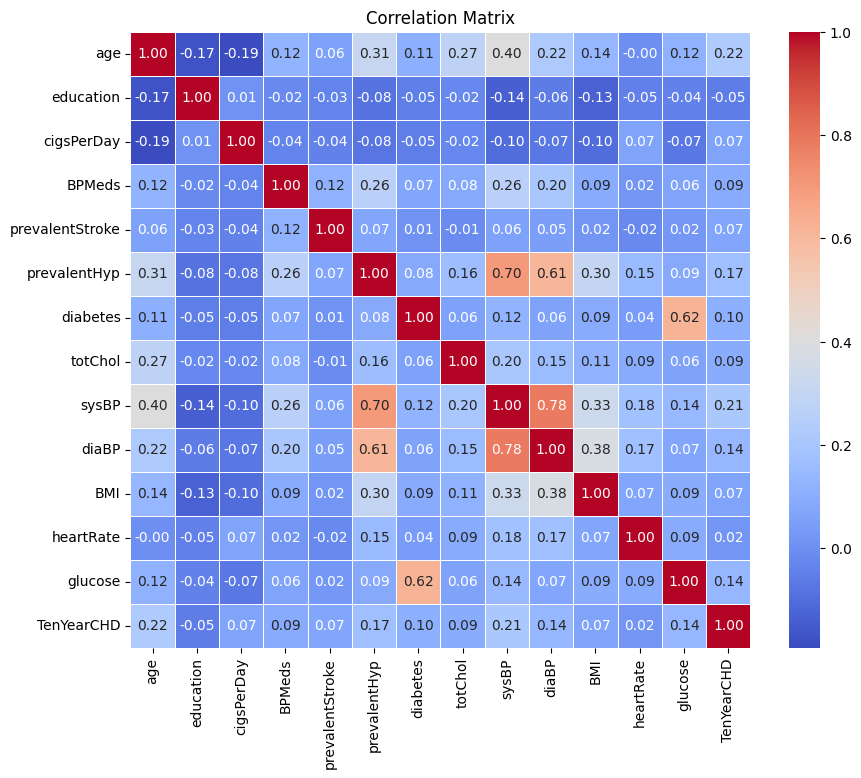

In [527]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

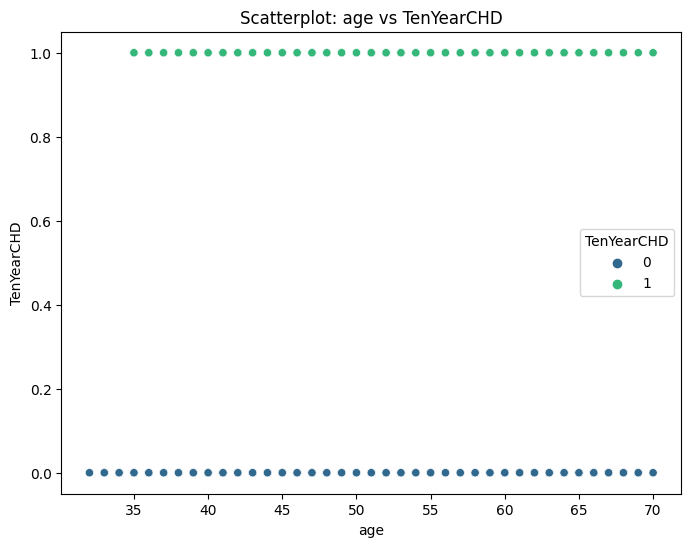

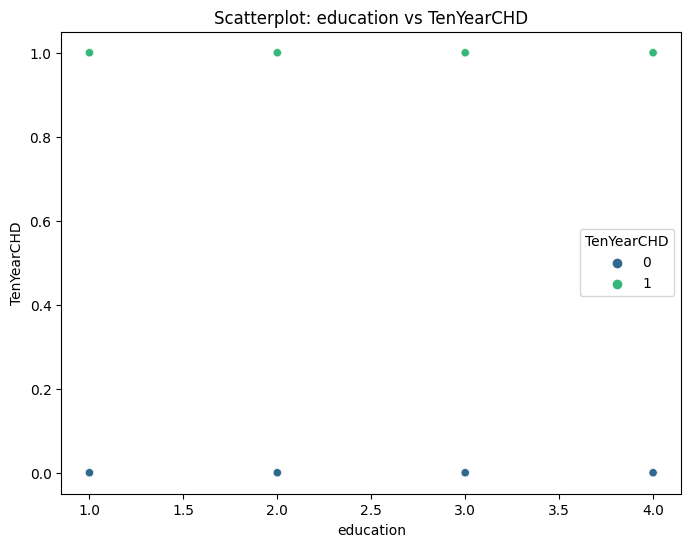

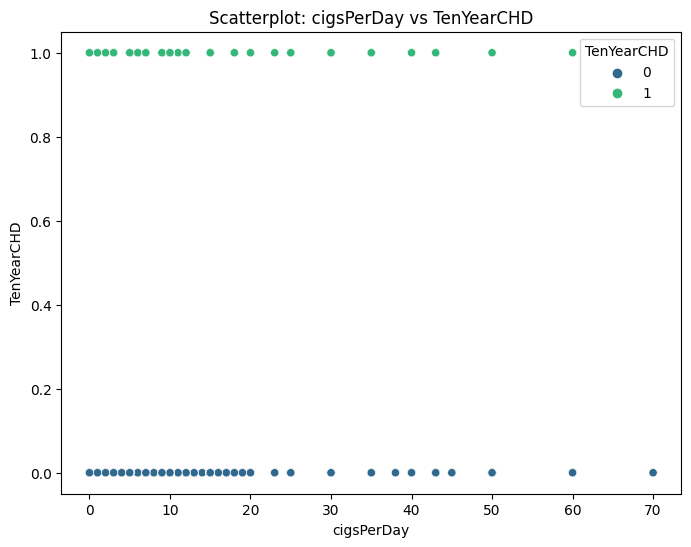

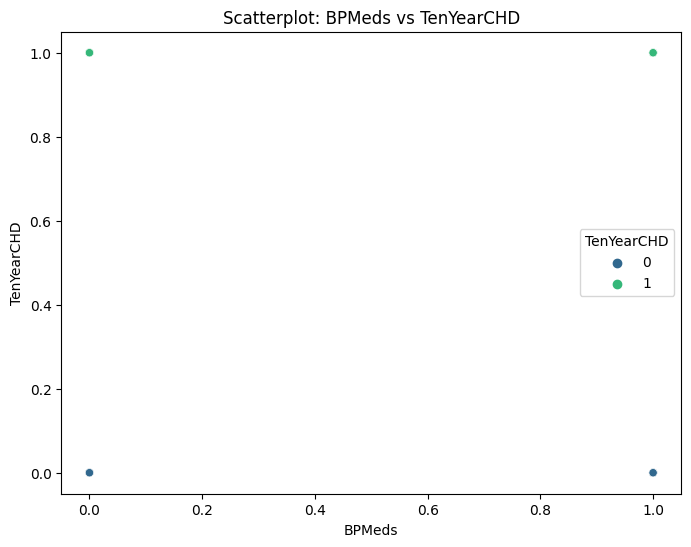

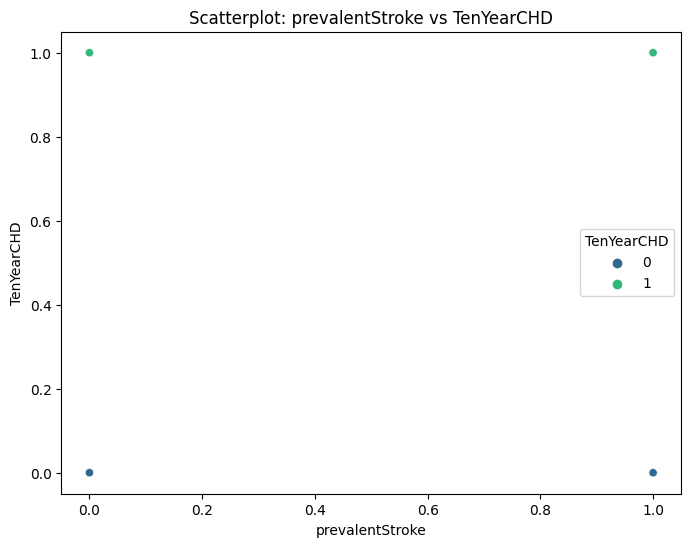

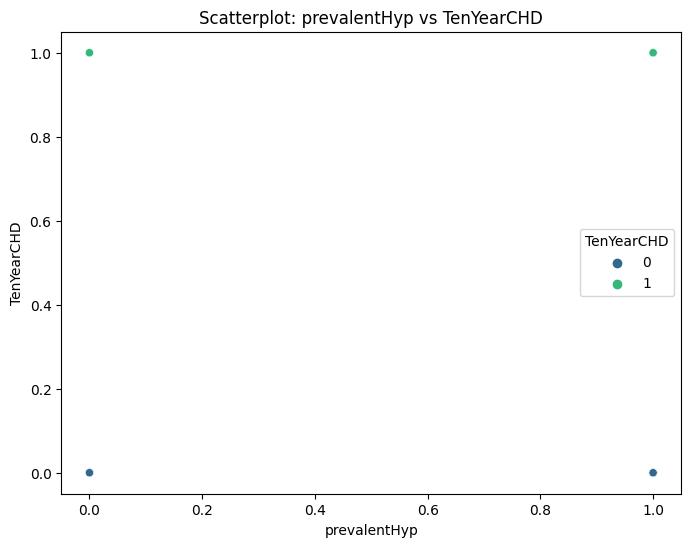

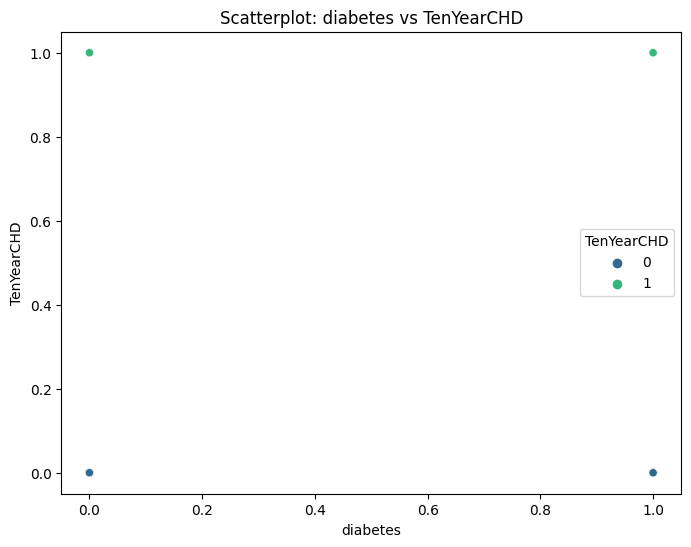

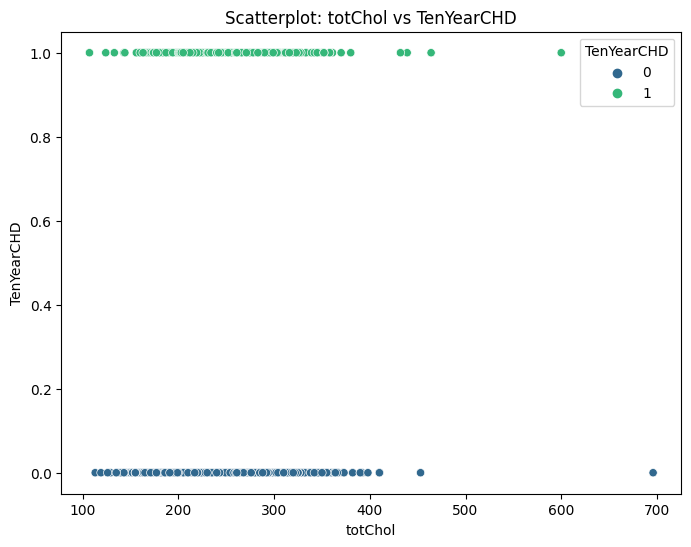

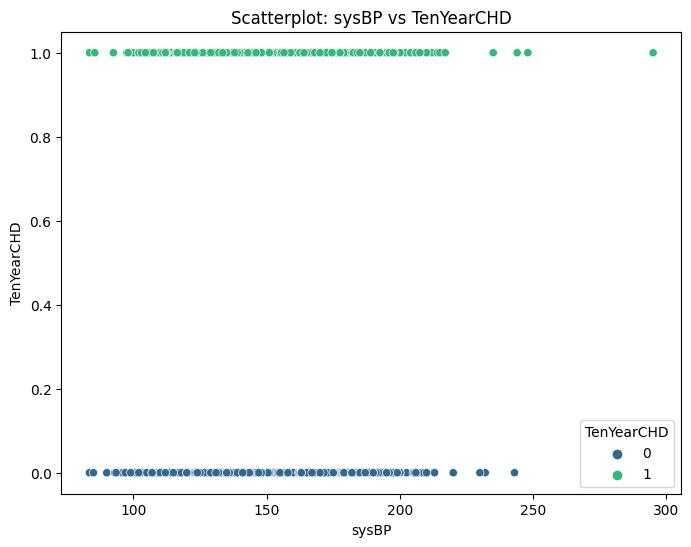

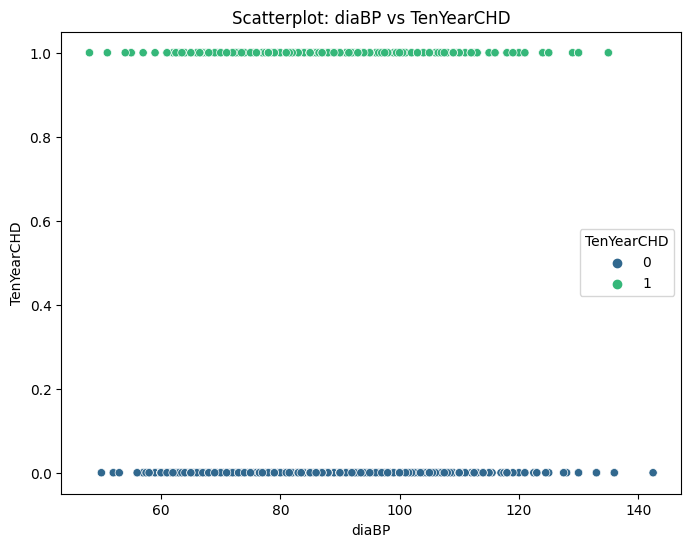

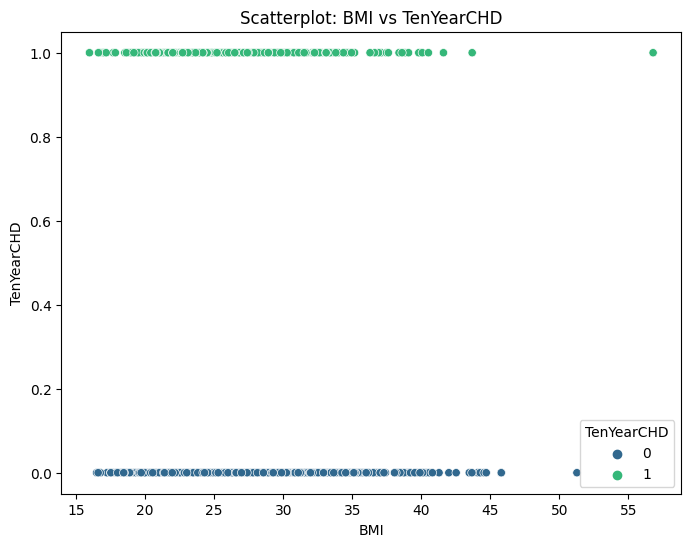

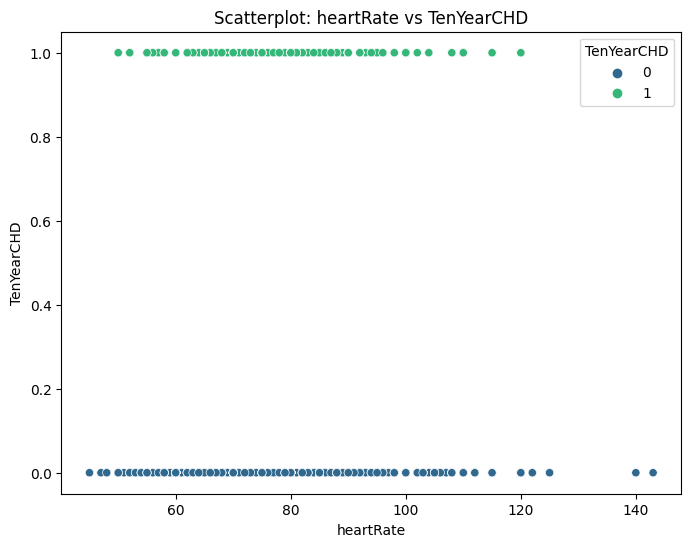

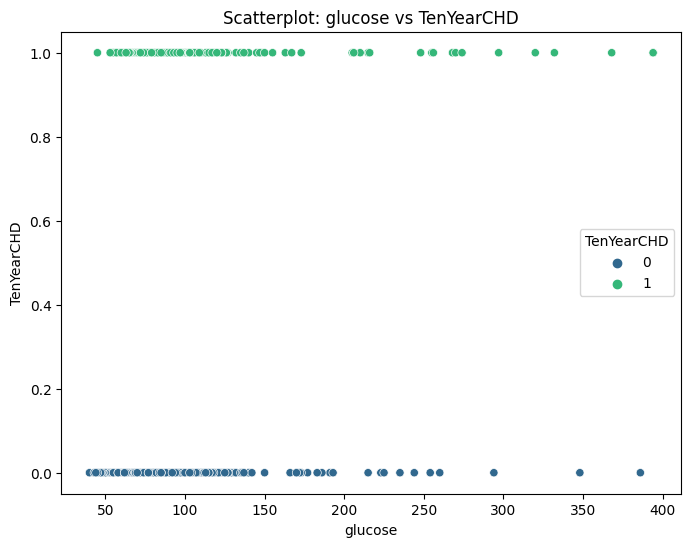

In [528]:
# Extract numerical columns for pair plotting
numerical_columns = df.select_dtypes(include='number').columns

# Create pair plots against 'TenYearCHD' using a for loop
for col in numerical_columns:
    if col != 'TenYearCHD':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='TenYearCHD', data=df, hue='TenYearCHD', palette='viridis')
        plt.title(f'Scatterplot: {col} vs TenYearCHD')
        plt.show()

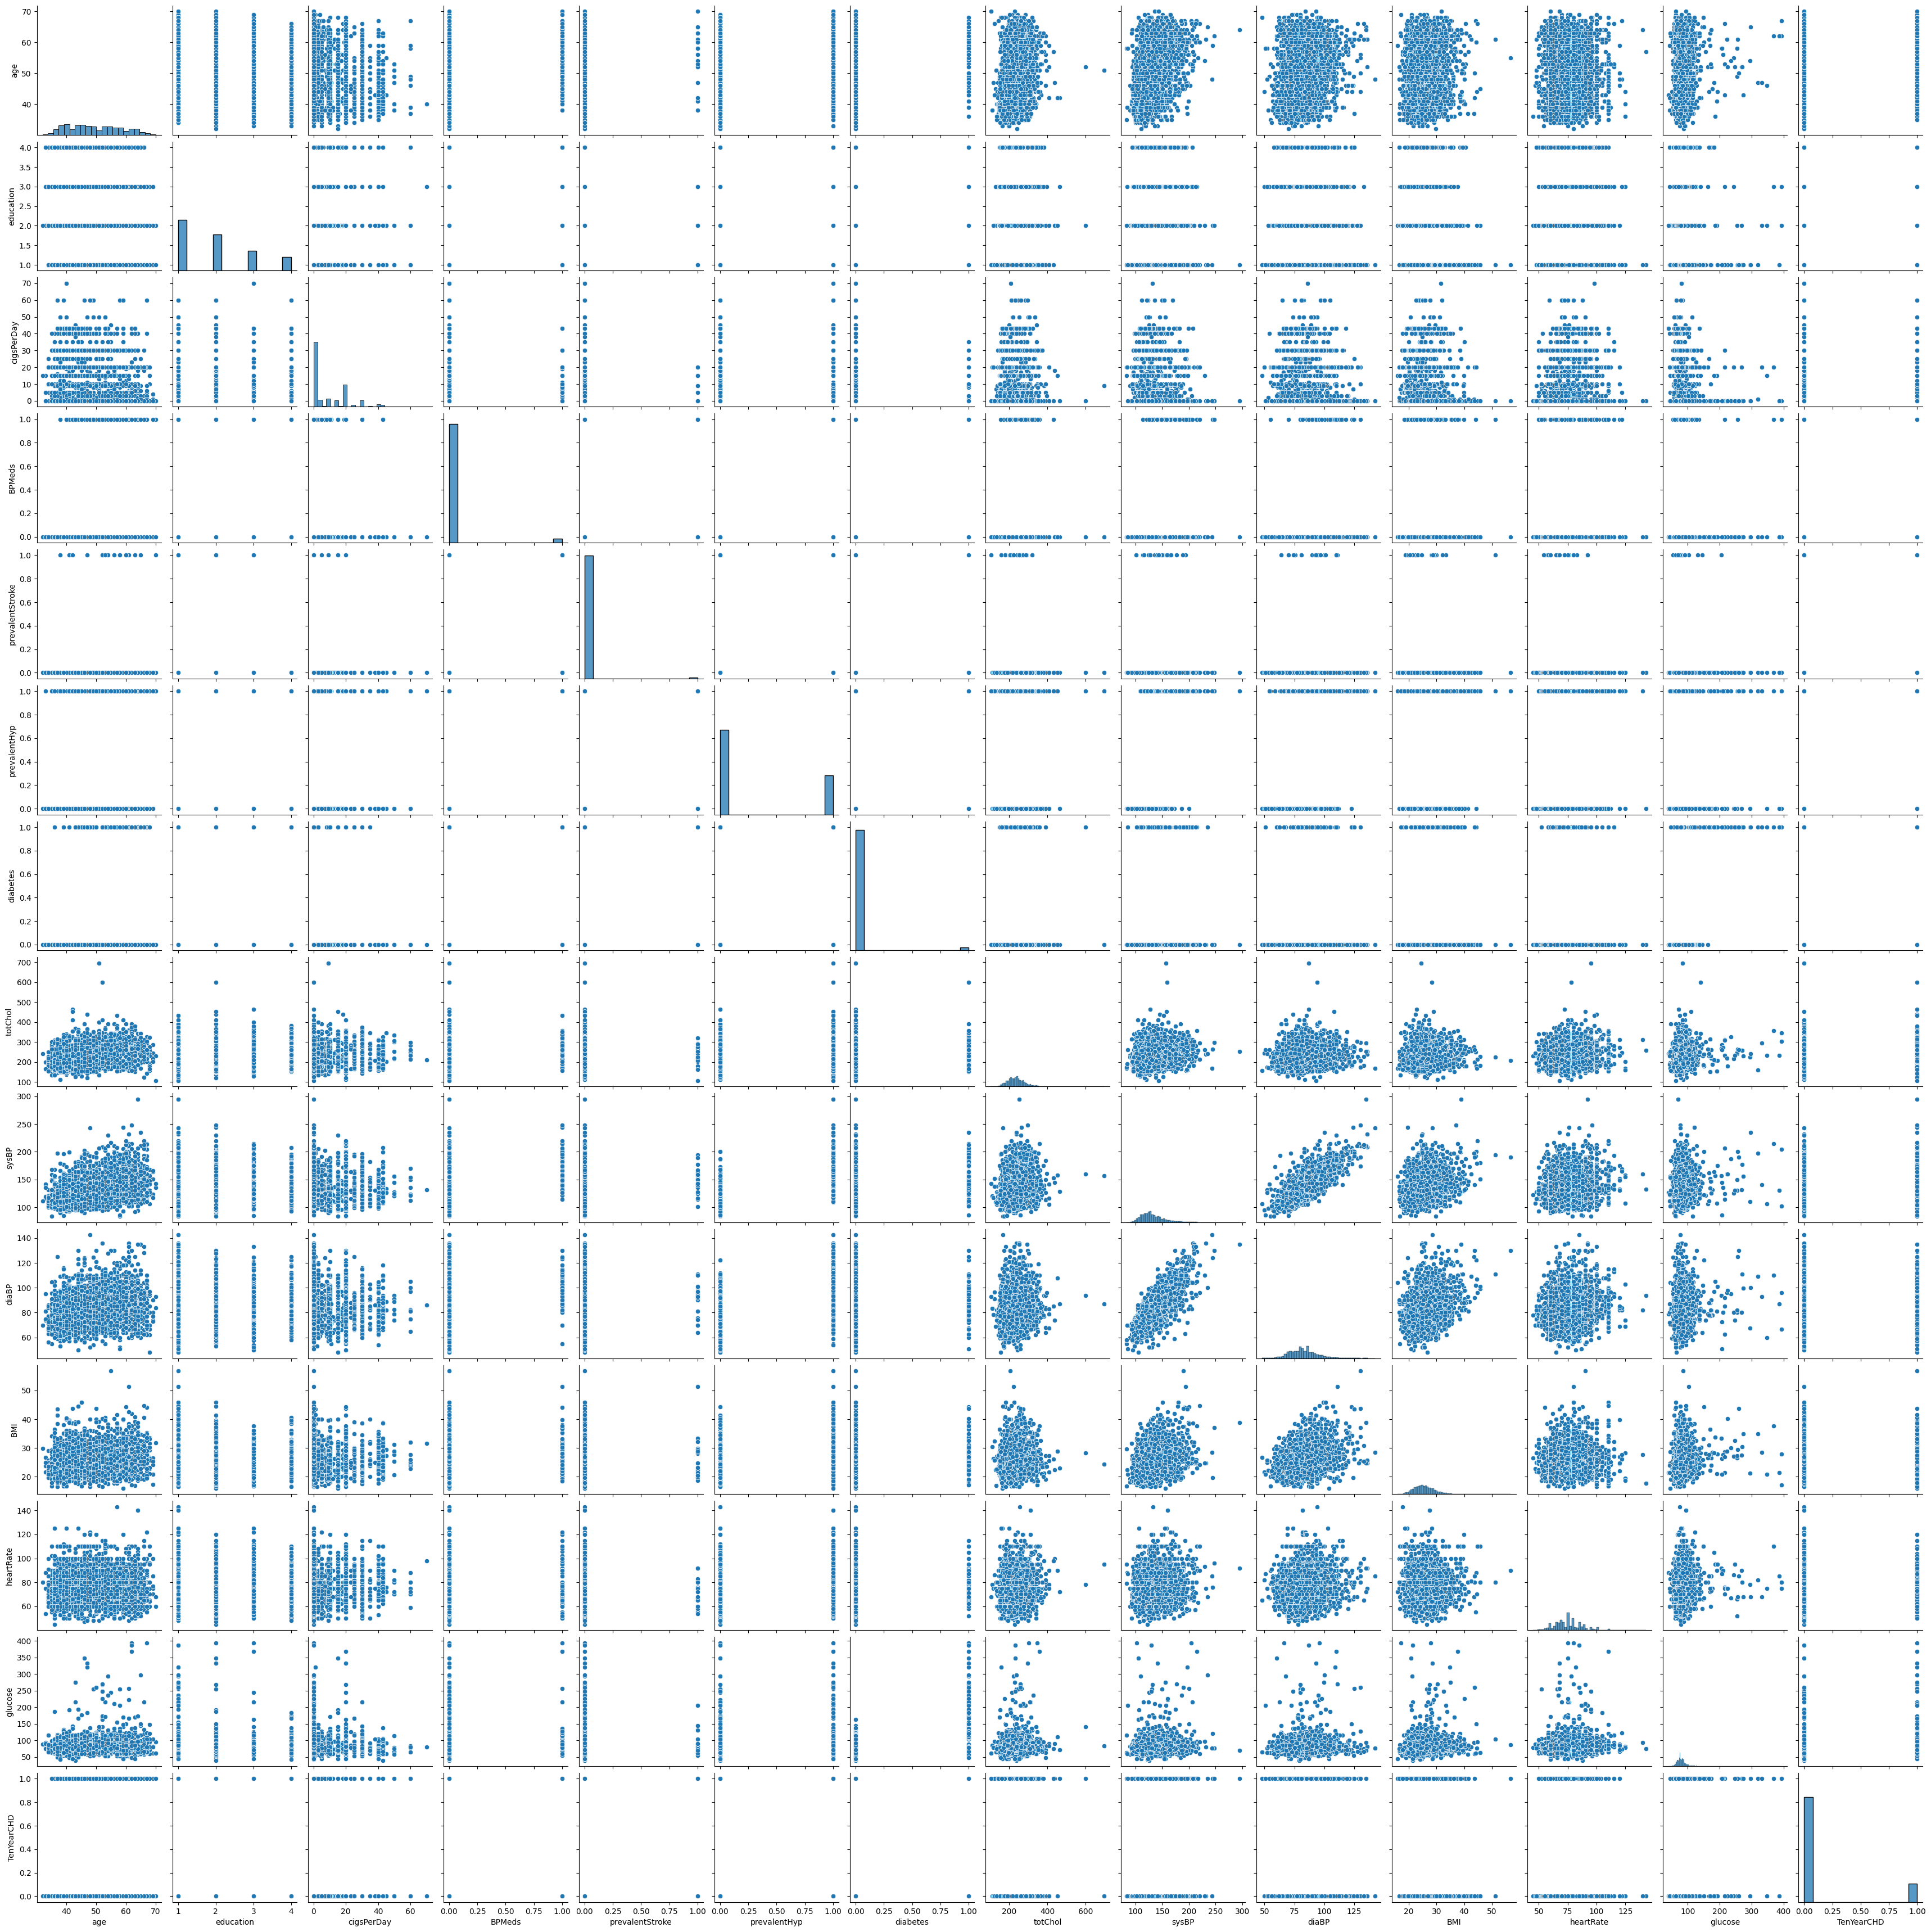

In [529]:
# Create a pair plot
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [530]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [531]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [532]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [533]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [534]:
df[df['education'].isna()]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
49     46        NaN   F        YES        20.0     0.0                0   
62     52        NaN   F         NO         0.0     0.0                0   
69     65        NaN   M         NO         0.0     0.0                0   
104    57        NaN   F         NO         0.0     1.0                0   
120    65        NaN   F         NO         0.0     0.0                0   
...   ...        ...  ..        ...         ...     ...              ...   
3045   52        NaN   M         NO         0.0     0.0                0   
3053   59        NaN   F         NO         0.0     0.0                0   
3252   48        NaN   M        YES         9.0     0.0                0   
3322   45        NaN   F        YES        30.0     0.0                0   
3331   40        NaN   M        YES        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
49               0         0    212.0  122.5   75.5  23.51       67.0   
62               0         0    268.0  109.0   70.0  23.74       75.0   
69               0         0      NaN  152.5   97.5  28.35       65.0   
104              1         0    190.0  155.0   85.0  26.08       55.0   
120              0         0    221.0  155.0   92.0  31.34       58.0   
...            ...       ...      ...    ...    ...    ...        ...   
3045             0         1    232.0  130.0   74.0  32.52       95.0   
3053             0         0    281.0  139.0   82.0  29.51       80.0   
3252             1         0    203.0  117.5   92.0  27.75       80.0   
3322             0         0    203.0  131.0   85.0  23.47       94.0   
3331             0         0    266.0  101.0   73.0    NaN       70.0   

      glucose  TenYearCHD  
49      103.0           0  
62       78.0           0  
69       73.0           0  
104      66.0           0  
120       NaN           0  
...       ...         ...  
3045    248.0           1  
3053     75.0           0  
3252    115.0           0  
3322     70.0           0  
3331     64.0           0  

[87 rows x 16 columns]

In [535]:
df['education']

0       2.0
1       4.0
2       1.0
3       1.0
4       1.0
       ... 
3385    1.0
3386    1.0
3387    3.0
3388    1.0
3389    3.0
Name: education, Length: 3390, dtype: float64

In [536]:
# Drop the 'education' column
df = df.drop('education', axis=1)

In [537]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [538]:
df[df['cigsPerDay'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
422   55   F        YES         NaN     0.0                0             1   
466   45   M        YES         NaN     0.0                0             1   
469   42   M        YES         NaN     0.0                0             0   
491   61   F        YES         NaN     0.0                0             1   
538   41   F        YES         NaN     0.0                0             0   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
422         0    213.0  163.0   91.0  28.66       69.0     66.0           0  
466         0    170.0  145.5   99.0  26.74       83.0     85.0           0  
469         0    196.0  123.0   73.0  22.06       66.0      NaN           0  
491         0    356.0  168.0   98.0  27.30      103.0    106.0           0  
538         0    171.0  135.0   82.5  24.35       79.0     82.0           0

In [539]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

Mean of 'cigsPerDay': 9.069477434679335


In [540]:
df['cigsPerDay'].fillna(column_mean, inplace=True)

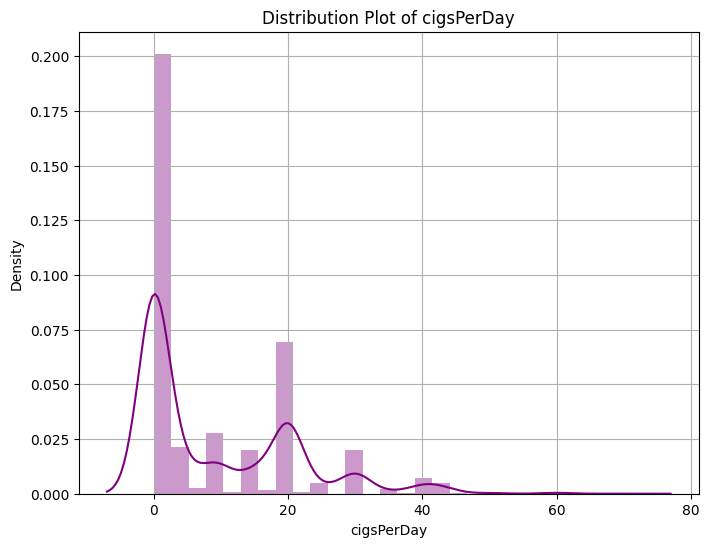

In [541]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['cigsPerDay'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of cigsPerDay')
plt.xlabel('cigsPerDay')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [542]:
df[df['BPMeds'].isna()].head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
8     41   F        YES        20.0     NaN                0             0   
102   68   F         NO         0.0     NaN                0             0   
128   67   F         NO         0.0     NaN                0             0   
174   60   F         NO         0.0     NaN                0             1   
194   56   F         NO         0.0     NaN                0             1   

     diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
8           0    220.0  126.0   78.0  20.70       86.0     79.0           0  
102         0    257.0  144.0   95.0  29.25       80.0     77.0           0  
128         0    261.0  117.0   63.0  22.55       75.0     83.0           0  
174         0    273.0  176.0   84.0  22.17       66.0     79.0           0  
194         0    391.0  126.0   84.0  24.83       80.0     78.0           0

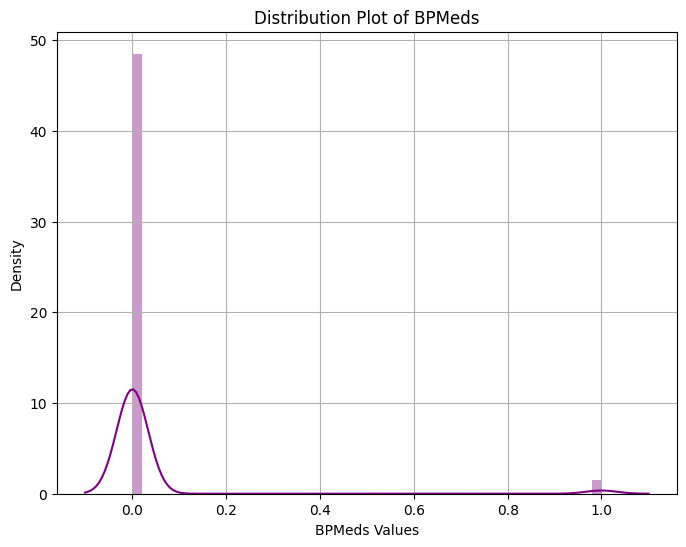

In [543]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['BPMeds'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of BPMeds')
plt.xlabel('BPMeds Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [544]:
# Calculate the mode of each column
mode_values = df['BPMeds'].mode().iloc[0]

# Replace NaN values with the mode for each column
df['BPMeds'] = df['BPMeds'].fillna(mode_values)


In [545]:
df.head()

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64   F        YES         3.0     0.0                0             0   
1   36   M         NO         0.0     0.0                0             1   
2   46   F        YES        10.0     0.0                0             0   
3   50   M        YES        20.0     0.0                0             1   
4   64   F        YES        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    221.0  148.0   85.0    NaN       90.0     80.0           1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0           0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0           0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0           1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0           0

In [546]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [547]:
df[df['totChol'].isna()]

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
10     61   F         NO         0.0     0.0                0             1   
69     65   M         NO         0.0     0.0                0             0   
254    52   F         NO         0.0     0.0                0             0   
290    37   F        YES        30.0     0.0                0             0   
554    38   F        YES         3.0     1.0                0             1   
625    62   F        YES        30.0     0.0                0             0   
700    44   F        YES         9.0     0.0                0             1   
732    61   F         NO         0.0     0.0                0             0   
797    58   M         NO         0.0     0.0                0             0   
808    47   F        YES        20.0     0.0                0             0   
1103   58   F        YES        20.0     0.0                0             0   
1219   62   F         NO         0.0     0.0                0             0   
1234   52   F        YES        20.0     0.0                0             0   
1267   49   F        YES        15.0     0.0                0             0   
1298   58   F        YES         8.0     1.0                0             1   
1347   48   F        YES        20.0     0.0                0             0   
1493   54   F        YES        20.0     0.0                0             0   
1695   59   F         NO         0.0     0.0                0             1   
1753   40   F        YES        15.0     0.0                0             0   
1756   58   F         NO         0.0     0.0                0             1   
1776   39   F        YES        40.0     0.0                0             0   
1780   47   F        YES        20.0     0.0                0             0   
1804   43   M        YES        30.0     0.0                0             1   
1856   39   F        YES        40.0     0.0                0             0   
1994   48   F        YES         2.0     0.0                0             0   
2254   52   F         NO         0.0     0.0                0             0   
2398   64   F        YES        10.0     0.0                0             1   
2453   67   F        YES         6.0     0.0                0             0   
2590   50   F         NO         0.0     0.0                0             1   
2596   58   F        YES         3.0     0.0                0             0   
2651   48   F        YES        20.0     0.0                0             1   
2884   51   F        YES        43.0     0.0                0             0   
3003   40   F         NO         0.0     0.0                0             0   
3022   52   F         NO         0.0     1.0                0             1   
3129   40   F        YES         3.0     0.0                0             0   
3154   50   F         NO         0.0     0.0                0             0   
3239   67   F        YES         9.0     0.0                0             1   
3290   67   F         NO         0.0     0.0                0             1   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
10           0      NaN  185.0  121.0  35.22       80.0      NaN           0  
69           0      NaN  152.5   97.5  28.35       65.0     73.0           0  
254          0      NaN  129.0   83.0  32.57       65.0      NaN           0  
290          0      NaN  115.0   79.0  28.41       85.0      NaN           0  
554          0      NaN  125.0   80.0  22.79       98.0      NaN           0  
625          0      NaN  153.0   60.0  27.47       60.0      NaN           0  
700          0      NaN  147.5   96.0  30.57       78.0      NaN           1  
732          0      NaN  115.0   60.0  25.50       76.0     99.0           0  
797          0      NaN  116.5   71.0  27.04       70.0     86.0           0  
808          0      NaN  121.0   70.0  23.09       80.0     83.0           0  
1103         0      NaN  126.0   77.0  30.08       78.0

In [548]:
df['totChol'].mean()

237.07428400954655

In [549]:
df['totChol'].mode()

0    240.0
Name: totChol, dtype: float64

In [550]:
df['totChol'].median()

234.0

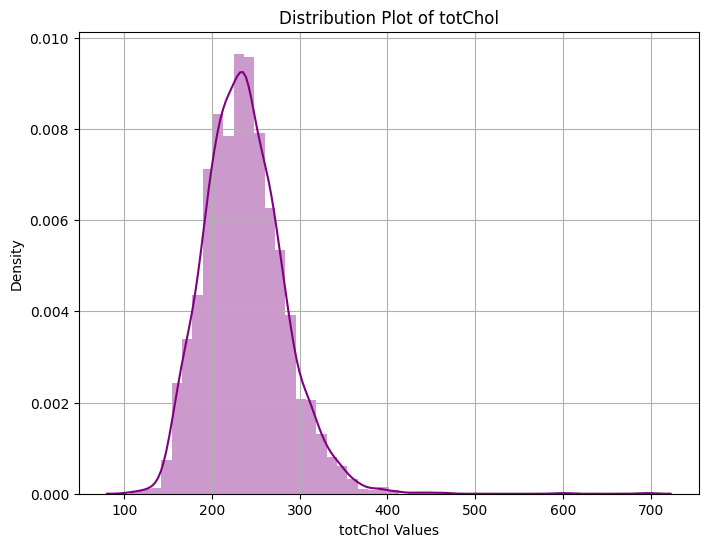

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['totChol'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of totChol')
plt.xlabel('totChol Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [552]:
# Calculate the mean of the 'totChol' column
mean_value = df['totChol'].mean()

# Replace NaN values in the 'totChol' column with the mean value
df['totChol'].fillna(mean_value, inplace=True)

In [553]:
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [554]:
df[df['BMI'].isna()]

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0      64   F        YES         3.0     0.0                0             0   
54     63   M        YES        20.0     0.0                1             1   
271    47   F         NO         0.0     0.0                0             0   
720    61   F         NO         0.0     0.0                0             1   
1057   64   M        YES        20.0     0.0                0             0   
1875   47   F        YES        25.0     0.0                0             1   
1895   38   M        YES        20.0     0.0                0             0   
1947   65   M         NO         0.0     0.0                0             1   
2231   70   F         NO         0.0     0.0                1             1   
2385   58   F        YES         1.0     0.0                0             1   
2626   39   F         NO         0.0     0.0                0             0   
2689   45   F         NO         0.0     0.0                0             0   
2991   40   F         NO         0.0     0.0                0             0   
3331   40   M        YES        20.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  TenYearCHD  
0            0    221.0  148.0   85.0  NaN       90.0     80.0           1  
54           0    213.0  163.0   94.0  NaN       76.0     69.0           1  
271          0    195.0  126.0   75.0  NaN       60.0      NaN           1  
720          0    300.0  150.5   89.0  NaN       68.0     72.0           1  
1057         0    225.0  120.0   75.0  NaN       70.0     94.0           0  
1875         1    258.0  195.0   90.0  NaN       86.0      NaN           1  
1895         0    215.0  110.0   80.0  NaN      100.0     73.0           0  
1947         1    240.0  235.0  100.0  NaN       68.0    297.0           1  
2231         0    107.0  143.0   93.0  NaN       68.0     62.0           1  
2385         0    244.0  160.5   98.0  NaN       86.0     69.0           0  
2626         0    229.0  119.0   63.5  NaN       76.0     83.0           0  
2689         0    231.0  107.5   57.5  NaN       81.0      NaN           0  
2991         0    164.0  135.0   75.0  NaN       75.0     85.0           0  
3331         0    266.0  101.0   73.0  NaN       70.0     64.0           0

In [555]:
df[df['heartRate'].isna()]

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1388   64   M        YES        18.0     0.0                0             1   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1388         0    219.0  172.5   75.0  29.29        NaN     91.0           1

In [556]:
df[df['glucose'].isna()]

age sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
9      55   F         NO         0.0     0.0                0             1   
10     61   F         NO         0.0     0.0                0             1   
36     46   F         NO         0.0     0.0                0             0   
38     41   F        YES         9.0     1.0                1             1   
55     51   F         NO         0.0     0.0                0             1   
...   ...  ..        ...         ...     ...              ...           ...   
3289   40   M        YES        10.0     0.0                0             0   
3290   67   F         NO         0.0     0.0                0             1   
3349   46   F         NO         0.0     0.0                0             0   
3370   46   F        YES        30.0     0.0                0             0   
3379   39   M        YES        30.0     0.0                0             0   

      diabetes     totChol  sysBP  diaBP    BMI  heartRate  glucose  \
9            0  326.000000  144.0   81.0  25.71       85.0      NaN   
10           0  237.074284  185.0  121.0  35.22       80.0      NaN   
36           0  193.000000  106.5   70.5  26.18       75.0      NaN   
38           0  180.000000  114.0   70.0  22.41       92.0      NaN   
55           0  351.000000  134.0   97.5  21.66      100.0      NaN   
...        ...         ...    ...    ...    ...        ...      ...   
3289         0  195.000000  110.0   70.0  24.75       79.0      NaN   
3290         0  237.074284  173.0  100.0  33.60       60.0      NaN   
3349         0  242.000000  129.0   85.0  27.40       80.0      NaN   
3370         0  219.000000  107.0   69.0  21.40       66.0      NaN   
3379         0  292.000000  120.0   85.0  31.09       85.0      NaN   

      TenYearCHD  
9              0  
10             0  
36             0  
38             0  
55             0  
...          ...  
3289           0  
3290           0  
3349           1  
3370           0  
3379           0  

[304 rows x 15 columns]

In [557]:
df['glucose'].mean()

82.08651976668827

In [558]:
df['glucose'].mode()

0    75.0
Name: glucose, dtype: float64

In [559]:
df['glucose'].median()

78.0

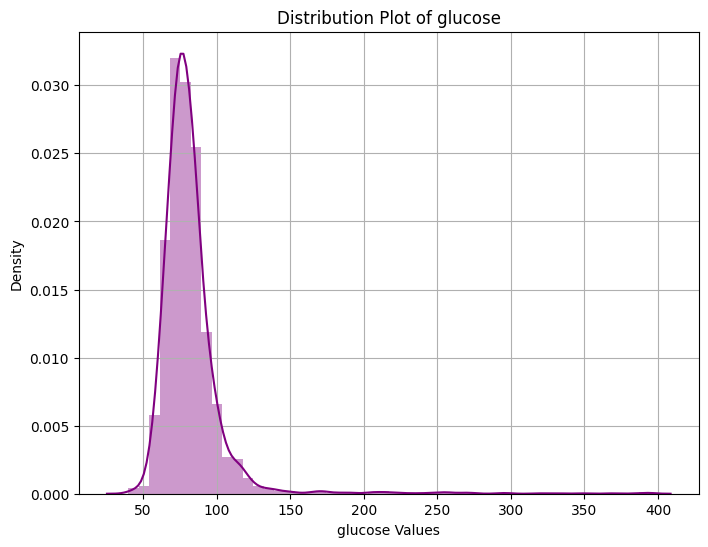

In [560]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for the 'BPMeds' column
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

sns.distplot(df['glucose'].dropna(), color='purple')  # Use dropna() to remove NaN values before plotting
plt.title('Distribution Plot of glucose')
plt.xlabel('glucose Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [561]:
# Calculate the mode of each column
median_values = df['glucose'].median()

# Replace NaN values with the mode for each column
df['glucose'] = df['glucose'].fillna(median_values)

In [562]:
df.isna().sum()

age                 0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                14
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [563]:
#drop the null values of BMI AND HEART RATE COLUMNS
df.dropna(inplace=True)

In [564]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3375 non-null   int64  
 1   sex              3375 non-null   object 
 2   is_smoking       3375 non-null   object 
 3   cigsPerDay       3375 non-null   float64
 4   BPMeds           3375 non-null   float64
 5   prevalentStroke  3375 non-null   int64  
 6   prevalentHyp     3375 non-null   int64  
 7   diabetes         3375 non-null   int64  
 8   totChol          3375 non-null   float64
 9   sysBP            3375 non-null   float64
 10  diaBP            3375 non-null   float64
 11  BMI              3375 non-null   float64
 12  heartRate        3375 non-null   float64
 13  glucose          3375 non-null   float64
 14  TenYearCHD       3375 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 421.9+ KB


In [566]:
# Select the desired columns from 'df'
categorical_column = ['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data_1 = df[categorical_column]

data_1.head()

sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD
1   M         NO     0.0                0             1         0           0
2   F        YES     0.0                0             0         0           0
3   M        YES     0.0                0             1         0           1
4   F        YES     0.0                0             0         0           0
5   F         NO     0.0                0             1         0           1

In [567]:
import pandas as pd

# Assuming 'df' is already defined and contains the data

# Select the desired columns from 'df'
selected_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data = df[selected_columns]

data.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0
5   61         0.0    272.0  182.0  121.0  32.80       85.0     65.0

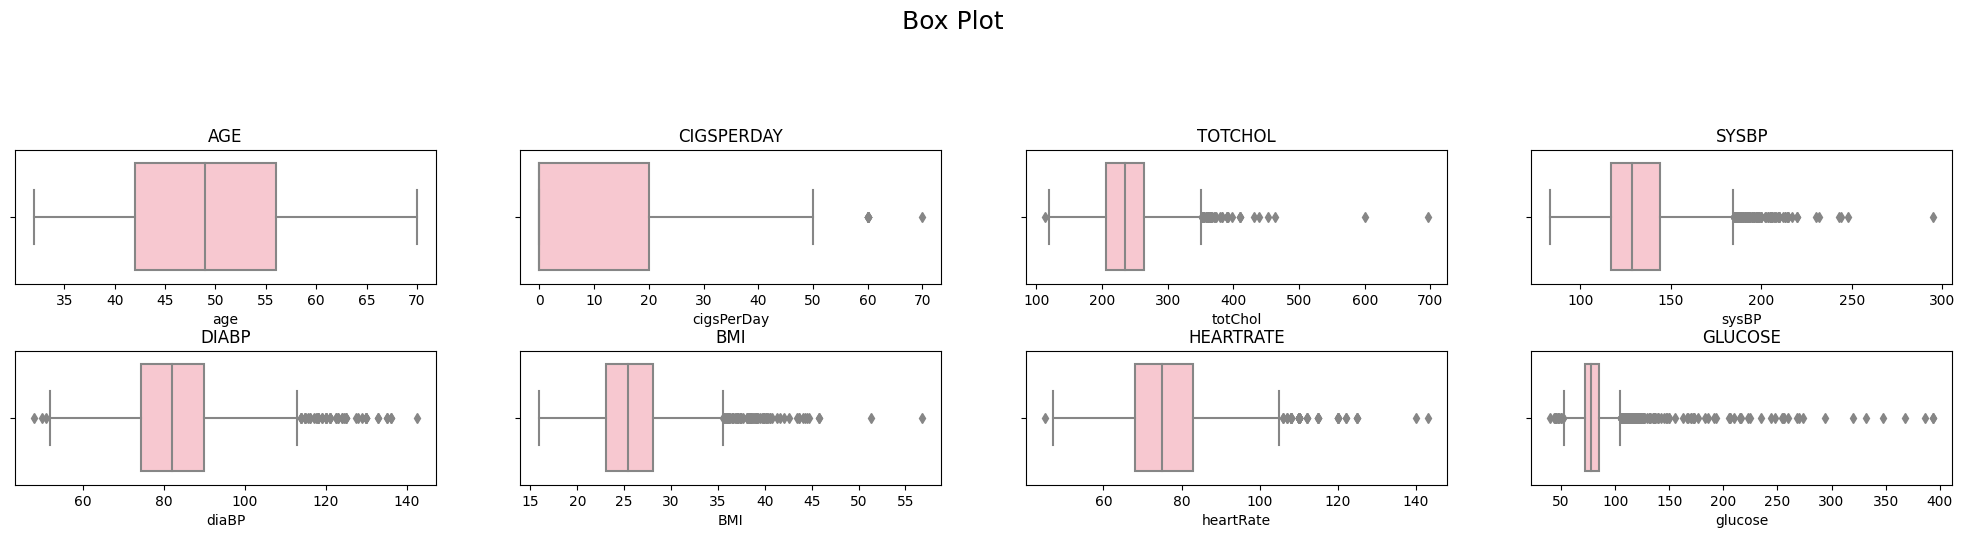

In [568]:
# Handling Outliers & Outlier treatments
df_2 = data.copy()
col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [569]:
# Handling Outliers & Outlier treatments
import pandas as pd
import numpy as np

def find_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (data < lower_bound) | (data > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers


outliers_per_column = find_outliers_iqr(data)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       213
sysBP         103
BMI            77
heartRate      64
diaBP          58
totChol        42
cigsPerDay      9
age             0
dtype: int64


In [570]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    data[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

age 

Percentiles: 25th=42.000, 75th=56.000, IQR=14.000

lower = 21.0 and upper = 77.0 
 
Identified outliers: 0

-------

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 42
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 103
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.020, 75th=28.040, IQR=5.020

lower = 15.49 and upper = 35.57 
 
Identified outliers: 77
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified out

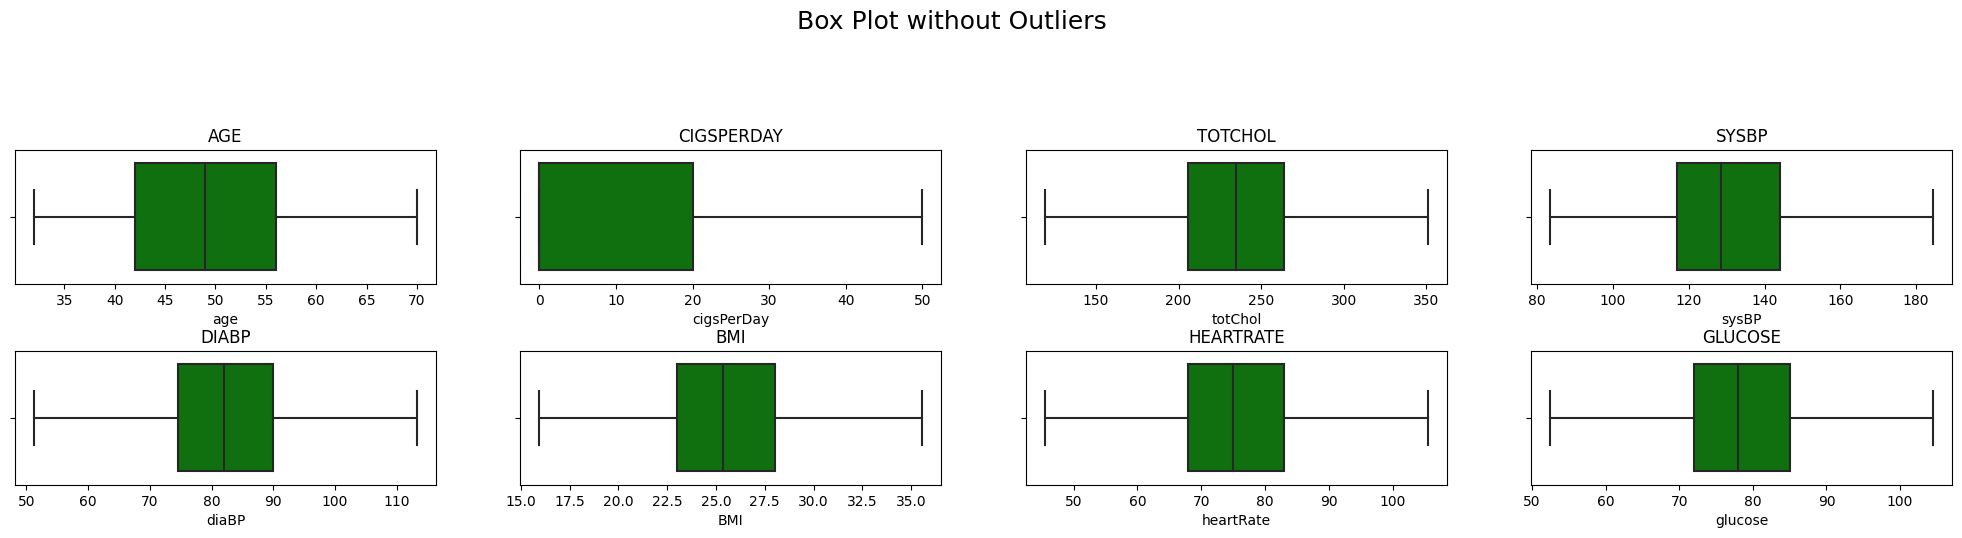

In [571]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [572]:
data.head()

age  cigsPerDay  totChol  sysBP   diaBP    BMI  heartRate  glucose
1   36         0.0    212.0  168.0   98.00  29.77       72.0     75.0
2   46        10.0    250.0  116.0   71.00  20.35       88.0     94.0
3   50        20.0    233.0  158.0   88.00  28.26       68.0     94.0
4   64        30.0    241.0  136.5   85.00  26.42       70.0     77.0
5   61         0.0    272.0  182.0  113.25  32.80       85.0     65.0

In [573]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_1, data],axis=1)

In [574]:
df_new.shape

(3375, 15)

In [575]:
df_new.head()

sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  \
1   M         NO     0.0                0             1         0           0   
2   F        YES     0.0                0             0         0           0   
3   M        YES     0.0                0             1         0           1   
4   F        YES     0.0                0             0         0           0   
5   F         NO     0.0                0             1         0           1   

   age  cigsPerDay  totChol  sysBP   diaBP    BMI  heartRate  glucose  
1   36         0.0    212.0  168.0   98.00  29.77       72.0     75.0  
2   46        10.0    250.0  116.0   71.00  20.35       88.0     94.0  
3   50        20.0    233.0  158.0   88.00  28.26       68.0     94.0  
4   64        30.0    241.0  136.5   85.00  26.42       70.0     77.0  
5   61         0.0    272.0  182.0  113.25  32.80       85.0     65.0

In [576]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3375 non-null   object 
 1   is_smoking       3375 non-null   object 
 2   BPMeds           3375 non-null   float64
 3   prevalentStroke  3375 non-null   int64  
 4   prevalentHyp     3375 non-null   int64  
 5   diabetes         3375 non-null   int64  
 6   TenYearCHD       3375 non-null   int64  
 7   age              3375 non-null   int64  
 8   cigsPerDay       3375 non-null   float64
 9   totChol          3375 non-null   float64
 10  sysBP            3375 non-null   float64
 11  diaBP            3375 non-null   float64
 12  BMI              3375 non-null   float64
 13  heartRate        3375 non-null   float64
 14  glucose          3375 non-null   float64
dtypes: float64(8), int64(5), object(2)
memory usage: 421.9+ KB


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [577]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

In [578]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['is_smoking_encoded'] = label_encoder.fit_transform(df_new['is_smoking'])


df_new.drop('is_smoking', axis=1, inplace=True)

In [579]:
df_new.head()

BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  age  \
1     0.0                0             1         0           0   36   
2     0.0                0             0         0           0   46   
3     0.0                0             1         0           1   50   
4     0.0                0             0         0           0   64   
5     0.0                0             1         0           1   61   

   cigsPerDay  totChol  sysBP   diaBP    BMI  heartRate  glucose  sex_encoded  \
1         0.0    212.0  168.0   98.00  29.77       72.0     75.0            1   
2        10.0    250.0  116.0   71.00  20.35       88.0     94.0            0   
3        20.0    233.0  158.0   88.00  28.26       68.0     94.0            1   
4        30.0    241.0  136.5   85.00  26.42       70.0     77.0            0   
5         0.0    272.0  182.0  113.25  32.80       85.0     65.0            0   

   is_smoking_encoded  
1                   0  
2                   1  
3                   1  
4                   1  
5                   0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [580]:
# Convert binary categorical variables to int64
binary_categorical_columns = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'cigsPerDay']
df_new[binary_categorical_columns] = df_new[binary_categorical_columns].astype('int64')

In [581]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3375 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BPMeds              3375 non-null   int64  
 1   prevalentStroke     3375 non-null   int64  
 2   prevalentHyp        3375 non-null   int64  
 3   diabetes            3375 non-null   int64  
 4   TenYearCHD          3375 non-null   int64  
 5   age                 3375 non-null   int64  
 6   cigsPerDay          3375 non-null   int64  
 7   totChol             3375 non-null   float64
 8   sysBP               3375 non-null   float64
 9   diaBP               3375 non-null   float64
 10  BMI                 3375 non-null   float64
 11  heartRate           3375 non-null   float64
 12  glucose             3375 non-null   float64
 13  sex_encoded         3375 non-null   int64  
 14  is_smoking_encoded  3375 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 421.9 KB


In [582]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_new.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['age', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose', 'sex_encoded',
       'is_smoking_encoded'],
      dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD',
       'cigsPerDay', 'sysBP'],
      dtype='object')


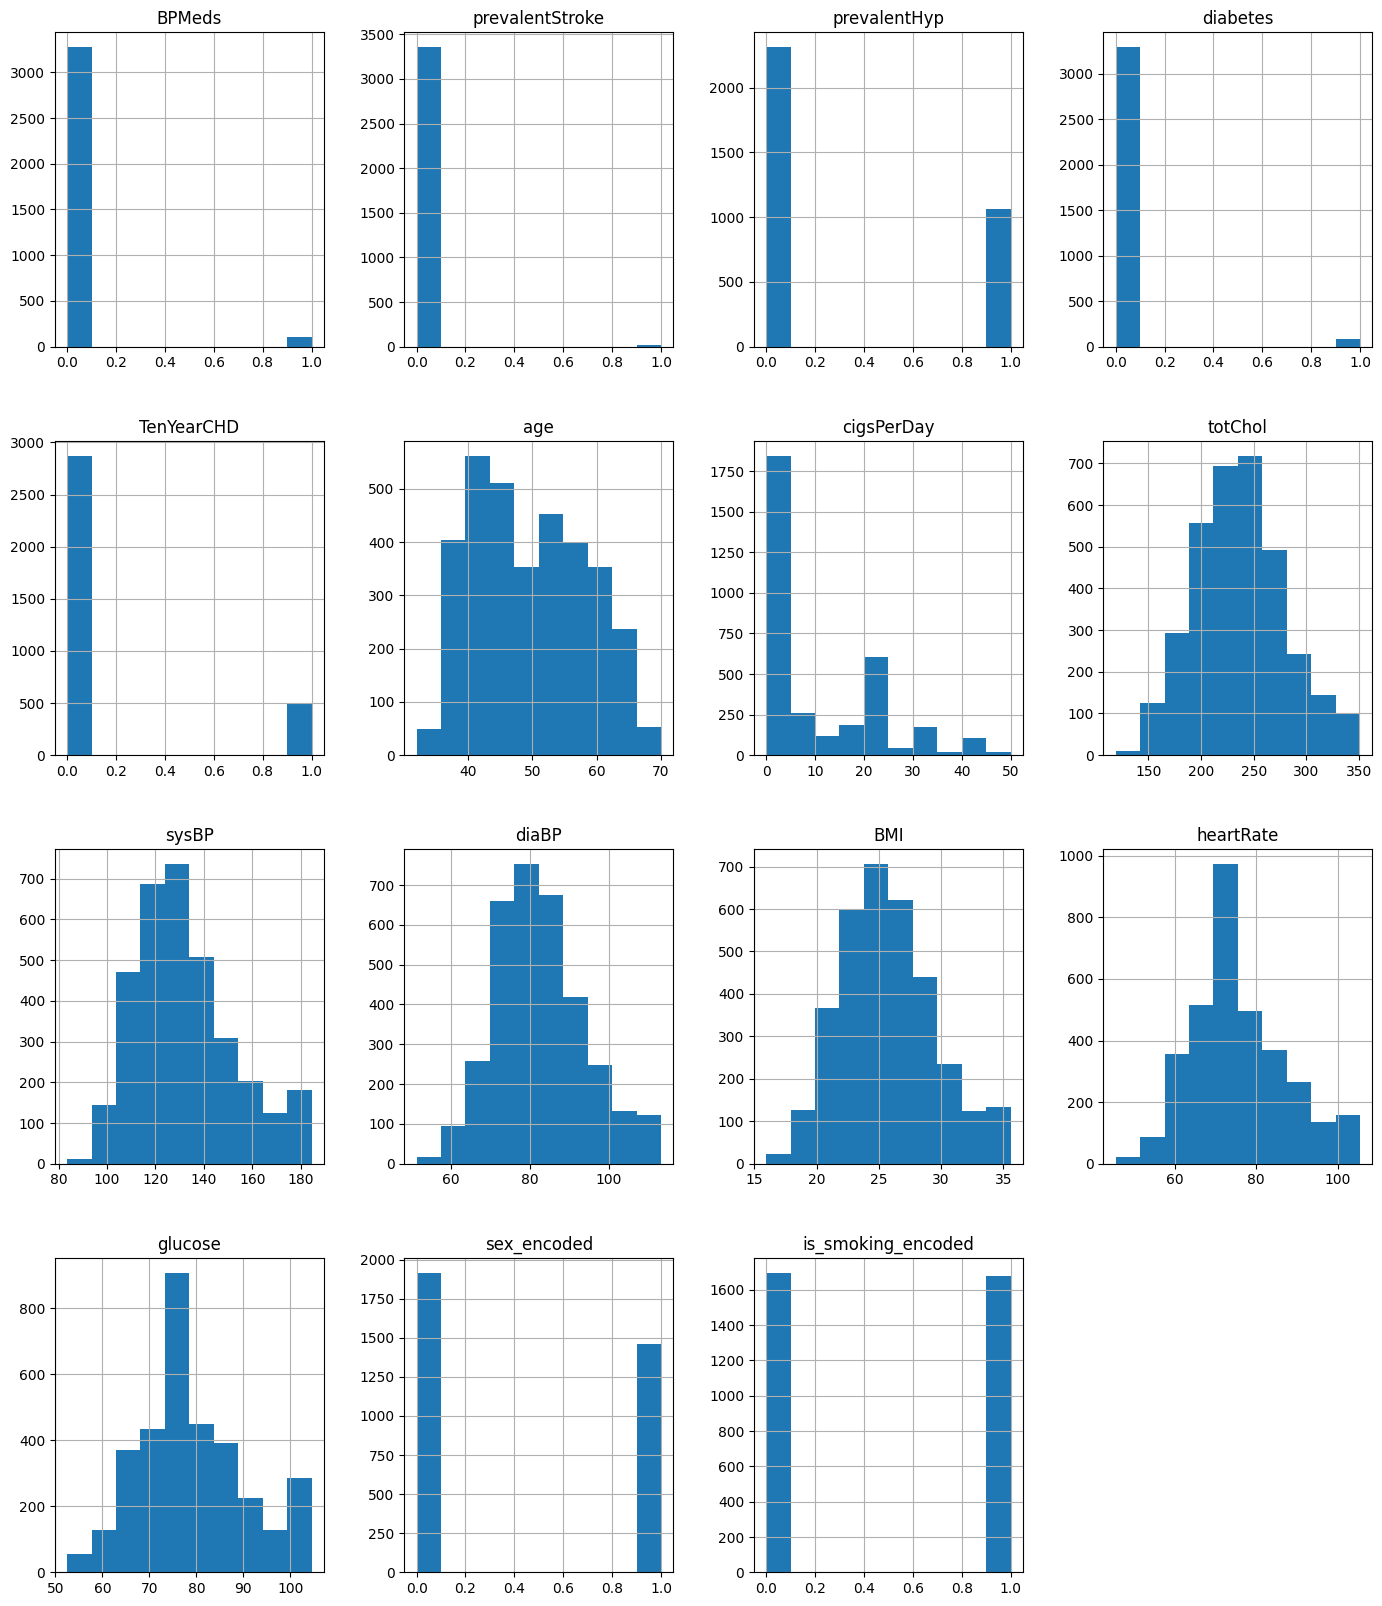

In [583]:
# Visualizing distributions using Histograms:
df_new.hist(figsize=(17, 20), grid=True);

In [584]:
symmetrical_data.head()

age  totChol   diaBP    BMI  heartRate  glucose  sex_encoded  \
1   36    212.0   98.00  29.77       72.0     75.0            1   
2   46    250.0   71.00  20.35       88.0     94.0            0   
3   50    233.0   88.00  28.26       68.0     94.0            1   
4   64    241.0   85.00  26.42       70.0     77.0            0   
5   61    272.0  113.25  32.80       85.0     65.0            0   

   is_smoking_encoded  
1                   0  
2                   1  
3                   1  
4                   1  
5                   0

In [585]:
skewed_data.head()

BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  cigsPerDay  \
1       0                0             1         0           0           0   
2       0                0             0         0           0          10   
3       0                0             1         0           1          20   
4       0                0             0         0           0          30   
5       0                0             1         0           1           0   

   sysBP  
1  168.0  
2  116.0  
3  158.0  
4  136.5  
5  182.0

#### 2. Feature Selection

In [586]:
# df_new.shape

In [587]:
# # Select your features wisely to avoid
# from sklearn.feature_selection import VarianceThreshold

# sel = VarianceThreshold(threshold=0.15)

# y = sel.fit_transform(df_new)

In [588]:
y.shape

(3360,)

###technique 2

In [589]:
# X = df_new.drop('TenYearCHD', axis=1)
# y = df_new['TenYearCHD']

In [590]:
# from sklearn.feature_selection import SelectKBest, f_classif

# # Assuming 'X' is your feature matrix and 'y' is your target variable
# # You may need to adapt the code based on your specific dataset

# # Select the top k features based on the F-score
# k_best_features = 10  # You can change this value based on your needs

# # Create a SelectKBest instance with the F-score as the score function
# selector = SelectKBest(score_func=f_classif, k=k_best_features)

# # Fit the selector to your data
# X_new = selector.fit_transform(X, y)

# # Get the indices of the selected features
# selected_features_indices = selector.get_support(indices=True)

# # Print the indices of the selected features
# print("Selected Features Indices:", selected_features_indices)

In [591]:
# X_new.shape

In [592]:
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier  # Replace with your preferred estimator

# # Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'X' and 'y' with your actual feature matrix and target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Replace RandomForestClassifier with your preferred estimator
# estimator = RandomForestClassifier()

# # Specify the number of features to select (optional)
# n_features_to_select = 5  # You can adjust this based on your needs

# # Create the RFE model
# rfe = RFE(estimator, n_features_to_select)

# # Fit the RFE model and transform the feature matrix
# X_rfe = rfe.fit_transform(X_train, y_train)

# # Get the selected feature indices
# selected_feature_indices = rfe.get_support(indices=True)

# # Display the selected feature indices
# print("Selected Feature Indices:", selected_feature_indices)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [593]:
# Transform Your data
import numpy as np

# Select the columns you want to transform
columns_to_transform = ['cigsPerDay', 'sysBP']

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

BPMeds  prevalentStroke  prevalentHyp  diabetes  TenYearCHD  cigsPerDay  \
1       0                0             1         0           0    0.000000   
2       0                0             0         0           0    2.397895   
3       0                0             1         0           1    3.044522   
4       0                0             0         0           0    3.433987   
5       0                0             1         0           1    0.000000   

      sysBP  
1  5.129899  
2  4.762174  
3  5.068904  
4  4.923624  
5  5.209486

In [594]:
symmetrical_data.head()

age  totChol   diaBP    BMI  heartRate  glucose  sex_encoded  \
1   36    212.0   98.00  29.77       72.0     75.0            1   
2   46    250.0   71.00  20.35       88.0     94.0            0   
3   50    233.0   88.00  28.26       68.0     94.0            1   
4   64    241.0   85.00  26.42       70.0     77.0            0   
5   61    272.0  113.25  32.80       85.0     65.0            0   

   is_smoking_encoded  
1                   0  
2                   1  
3                   1  
4                   1  
5                   0

In [595]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [596]:
tranformed_data.head()

age  totChol   diaBP    BMI  heartRate  glucose  sex_encoded  \
1   36    212.0   98.00  29.77       72.0     75.0            1   
2   46    250.0   71.00  20.35       88.0     94.0            0   
3   50    233.0   88.00  28.26       68.0     94.0            1   
4   64    241.0   85.00  26.42       70.0     77.0            0   
5   61    272.0  113.25  32.80       85.0     65.0            0   

   is_smoking_encoded  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
1                   0       0                0             1         0   
2                   1       0                0             0         0   
3                   1       0                0             1         0   
4                   1       0                0             0         0   
5                   0       0                0             1         0   

   TenYearCHD  cigsPerDay     sysBP  
1           0    0.000000  5.129899  
2           0    2.397895  4.762174  
3           1    3.044522  5.068904  
4           0    3.433987  4.923624  
5           1    0.000000  5.209486

In [597]:
tranformed_data.shape

(3375, 15)

### 6. Data Scaling

In [598]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'tranformed_data' is your DataFrame
# Replace 'tranformed_data' with the actual name of your DataFrame

# Extract the 'TenYearCHD' column before scaling
ten_year_chd_column = tranformed_data['TenYearCHD']

# Drop the 'TenYearCHD' column before scaling
features_to_scale = tranformed_data.drop('TenYearCHD', axis=1)


# Scale the remaining features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a new DataFrame with the scaled features and 'TenYearCHD' column
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Add the 'TenYearCHD' column back to the DataFrame
df_scaled['TenYearCHD'] = ten_year_chd_column

# Display the DataFrame with scaled features
df_scaled.head()

age   totChol     diaBP       BMI  heartRate   glucose  sex_encoded  \
0  0.105263  0.400862  0.754032  0.704233   0.441667  0.432692          1.0   
1  0.368421  0.564655  0.318548  0.223865   0.708333  0.798077          0.0   
2  0.473684  0.491379  0.592742  0.627231   0.375000  0.798077          1.0   
3  0.842105  0.525862  0.544355  0.533401   0.408333  0.471154          0.0   
4  0.763158  0.659483  1.000000  0.858746   0.658333  0.240385          0.0   

   is_smoking_encoded  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0                 0.0     0.0              0.0           1.0       0.0   
1                 1.0     0.0              0.0           0.0       0.0   
2                 1.0     0.0              0.0           1.0       0.0   
3                 1.0     0.0              0.0           0.0       0.0   
4                 0.0     0.0              0.0           1.0       0.0   

   cigsPerDay     sysBP  TenYearCHD  
0    0.000000  0.881526         NaN  
1    0.609868  0.413864         0.0  
2    0.774328  0.803955         0.0  
3    0.873382  0.619192         1.0  
4    0.000000  0.982744         0.0

In [599]:
df_scaled.shape

(3375, 15)

In [600]:
df_scaled.isna().sum()

age                    0
totChol                0
diaBP                  0
BMI                    0
heartRate              0
glucose                0
sex_encoded            0
is_smoking_encoded     0
BPMeds                 0
prevalentStroke        0
prevalentHyp           0
diabetes               0
cigsPerDay             0
sysBP                  0
TenYearCHD            15
dtype: int64

In [601]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [602]:
df_scaled.isna().sum()

age                   0
totChol               0
diaBP                 0
BMI                   0
heartRate             0
glucose               0
sex_encoded           0
is_smoking_encoded    0
BPMeds                0
prevalentStroke       0
prevalentHyp          0
diabetes              0
cigsPerDay            0
sysBP                 0
TenYearCHD            0
dtype: int64

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [603]:
y = df_scaled['TenYearCHD']

In [604]:
X = df_scaled.drop('TenYearCHD', axis=1)

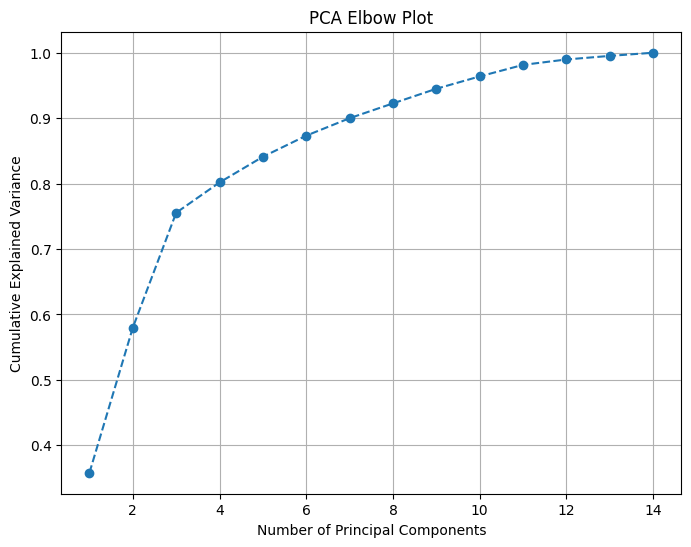

In [605]:
# DImensionality Reduction (If needed)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create an elbow plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid()
plt.show()


# Create a PCA instance and specify the number of components you want to retain
# For example, if you want to retain 10 components, set n_components=10
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model to your standardized data and transform it
transformed_data_pca = pca.fit_transform(X)

# The variable 'transformed_data_pca' now contains your data in the reduced-dimensional space with 'n_components' principal components.

# You can also access explained variance to see how much variance is explained by each component
explained_variance = pca.explained_variance_ratio_

In [606]:
# the variances of the pca that we extract and there importance in predicting the output
explained_variance

array([0.35808536, 0.22173457, 0.17558484, 0.04632491, 0.0392524 ,
       0.03226112, 0.02668098, 0.02263418, 0.02235944, 0.01886829])

In [607]:
#calculating the total of  explained_variance  which needs to be more than 90%
explained_variance.sum()

0.9637860996602189

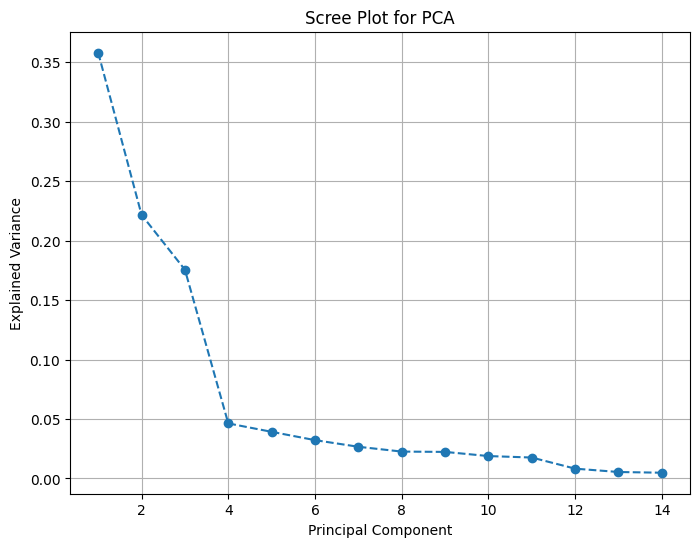

In [608]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize a PCA instance without specifying the number of components
pca = PCA()

# Fit the PCA model to your standardized data
pca.fit(X)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [609]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = transformed_data_pca
y = df_scaled['TenYearCHD']

In [611]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=3)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [612]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [613]:
# Handling Imbalanced Dataset (If needed)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'transformed_data_pca' contains your feature data and 'df_scaled' is your DataFrame
x = transformed_data_pca
y = df_scaled['TenYearCHD']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Now, x_resampled and y_resampled contain the balanced training data
# x_test and y_test remain unchanged for testing

# You can use x_resampled and y_resampled to train your model
# and x_test, y_test to evaluate its performance

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic regression

AUC Score: 0.48399673017669625
Training Score: 0.5554106910039114
Testing Score: 0.5178571428571429
Confusion Matrix:
[[300 258]
 [ 66  48]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.54      0.65       558
         1.0       0.16      0.42      0.23       114

    accuracy                           0.52       672
   macro avg       0.49      0.48      0.44       672
weighted avg       0.71      0.52      0.58       672



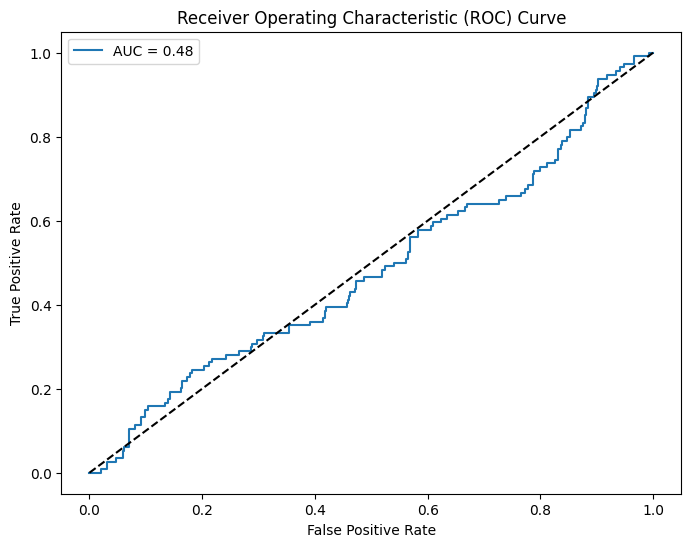

In [624]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Assuming x_resampled and y_resampled are the balanced training data from SMOTE

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the balanced training data
model.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {roc_auc}")

# Training score
training_score = model.score(x_resampled, y_resampled)
print(f"Training Score: {training_score}")

# Testing score
testing_score = model.score(x_test, y_test)
print(f"Testing Score: {testing_score}")

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
AUC Score for Best Model: 0.4842482550462177
Cross-Validation AUC Scores: [0.55341884 0.60529567 0.60692817 0.55667297 0.58446125]
Training Score: 0.5556279878313777
Testing Score: 0.5193452380952381
Confusion Matrix:
[[300 258]
 [ 65  49]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.54      0.65       558
         1.0       0.16      0.43      0.23       114

    accuracy                           0.52       672
   macro avg       0.49      0.48      0.44       672
weighted avg       0.71      0.52      0.58       672



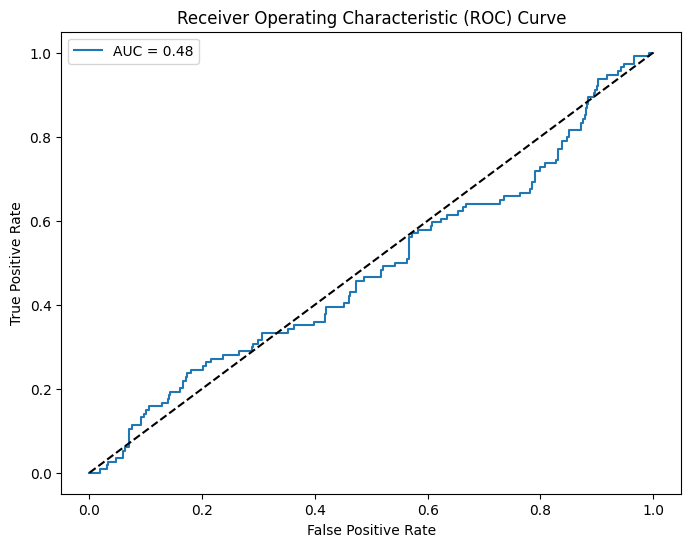

In [625]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

# Define cross-validation strategy
cv = 5  # Number of folds

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)
grid_search.fit(x_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
y_pred_prob = grid_search.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score for the best model
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score for Best Model: {roc_auc}")

# Cross-validation scores
cv_scores = cross_val_score(grid_search.best_estimator_, x_resampled, y_resampled, cv=cv, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {cv_scores}")

# Training score
training_score = grid_search.best_estimator_.score(x_resampled, y_resampled)
print(f"Training Score: {training_score}")

# Testing score
testing_score = grid_search.best_estimator_.score(x_test, y_test)
print(f"Testing Score: {testing_score}")

# Make predictions on the test data
y_pred = grid_search.best_estimator_.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

AUC Score (Decision Tree): 0.4487360875306545
Training Score (Decision Tree): 1.0
Testing Score (Decision Tree): 0.6235119047619048
Confusion Matrix (Decision Tree):
[[398 160]
 [ 93  21]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.81      0.71      0.76       558
         1.0       0.12      0.18      0.14       114

    accuracy                           0.62       672
   macro avg       0.46      0.45      0.45       672
weighted avg       0.69      0.62      0.65       672



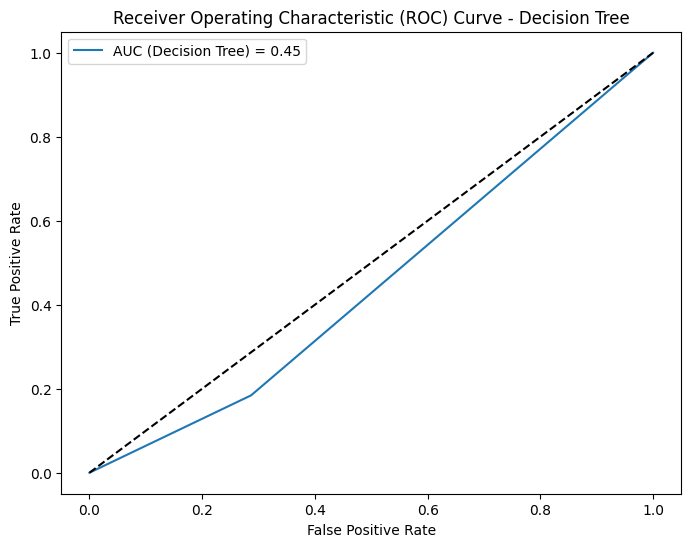

In [626]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the balanced training data
dt_model.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_prob_dt = dt_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calculate the AUC score
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"AUC Score (Decision Tree): {roc_auc_dt}")

# Training score
training_score_dt = dt_model.score(x_resampled, y_resampled)
print(f"Training Score (Decision Tree): {training_score_dt}")

# Testing score
testing_score_dt = dt_model.score(x_test, y_test)
print(f"Testing Score (Decision Tree): {testing_score_dt}")

# Make predictions on the test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate the Decision Tree model
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

Best Hyperparameters (Decision Tree): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
AUC Score for Best Model (Decision Tree): 0.4991432434131925
Cross-Validation AUC Scores (Decision Tree): [0.79264595 0.78167264 0.76949905 0.78737476 0.76911862]
Training Score for Best Model (Decision Tree): 0.9315514993481095
Testing Score for Best Model (Decision Tree): 0.6473214285714286
Confusion Matrix (Decision Tree):
[[408 150]
 [ 87  27]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       558
         1.0       0.15      0.24      0.19       114

    accuracy                           0.65       672
   macro avg       0.49      0.48      0.48       672
weighted avg       0.71      0.65      0.67       672



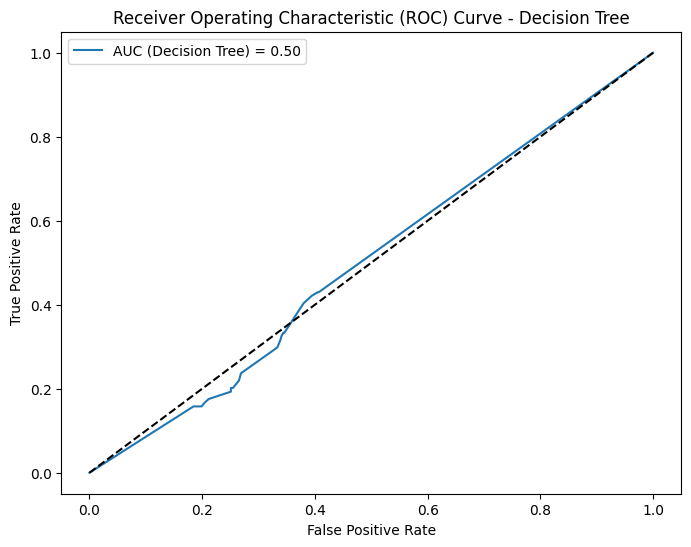

In [627]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define cross-validation strategy
cv_dt = 5  # Number of folds

# Hyperparameter tuning using GridSearchCV
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='roc_auc', cv=cv_dt, n_jobs=-1)
grid_search_dt.fit(x_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters (Decision Tree):", grid_search_dt.best_params_)

# Make predictions on the test data using the best Decision Tree model
y_pred_prob_dt = grid_search_dt.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calculate the AUC score for the best Decision Tree model
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
print(f"AUC Score for Best Model (Decision Tree): {roc_auc_dt}")

# Cross-validation scores for Decision Tree
cv_scores_dt = cross_val_score(grid_search_dt.best_estimator_, x_resampled, y_resampled, cv=cv_dt, scoring='roc_auc')
print(f"Cross-Validation AUC Scores (Decision Tree): {cv_scores_dt}")

# Training score for Decision Tree
training_score_dt = grid_search_dt.best_estimator_.score(x_resampled, y_resampled)
print(f"Training Score for Best Model (Decision Tree): {training_score_dt}")

# Testing score for Decision Tree
testing_score_dt = grid_search_dt.best_estimator_.score(x_test, y_test)
print(f"Testing Score for Best Model (Decision Tree): {testing_score_dt}")

# Make predictions on the test data using the best Decision Tree model
y_pred_dt = grid_search_dt.best_estimator_.predict(x_test)

# Evaluate the best Decision Tree model
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Plot the ROC curve for the best Decision Tree model
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

### ML Model - 1

AUC Score (Random Forest): 0.46732534741872606
Training Score (Random Forest): 1.0
Testing Score (Random Forest): 0.7321428571428571
Confusion Matrix (Random Forest):
[[480  78]
 [102  12]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       558
         1.0       0.13      0.11      0.12       114

    accuracy                           0.73       672
   macro avg       0.48      0.48      0.48       672
weighted avg       0.71      0.73      0.72       672



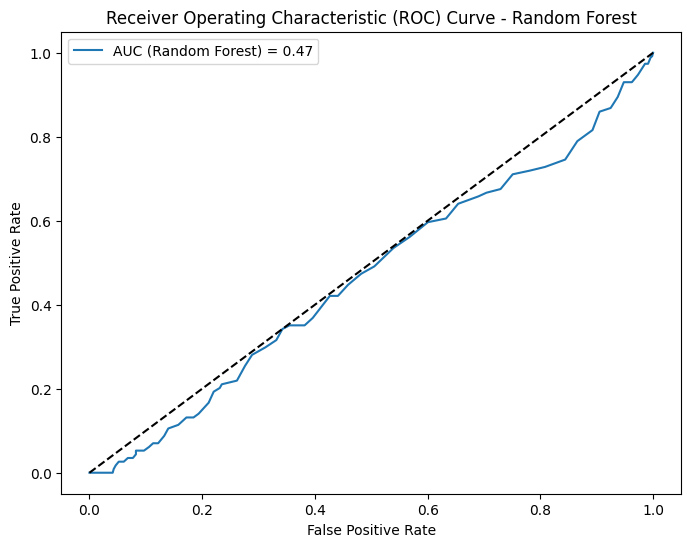

In [628]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the balanced training data
rf_model.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_prob_rf = rf_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculate the AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC Score (Random Forest): {roc_auc_rf}")

# Training score
training_score_rf = rf_model.score(x_resampled, y_resampled)
print(f"Training Score (Random Forest): {training_score_rf}")

# Testing score
testing_score_rf = rf_model.score(x_test, y_test)
print(f"Testing Score (Random Forest): {testing_score_rf}")

# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate the Random Forest model
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
AUC Score for Best Model (Random Forest): 0.4644642520279192
Cross-Validation AUC Scores (Random Forest): [0.95463784 0.95956805 0.95360113 0.96169896 0.96626181]
Training Score for Best Model (Random Forest): 1.0
Testing Score for Best Model (Random Forest): 0.7351190476190477
Confusion Matrix (Random Forest):
[[481  77]
 [101  13]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       558
         1.0       0.14      0.11      0.13       114

    accuracy                           0.74       672
   macro avg       0.49      0.49      0.49       672
weighted avg       0.71      0.74      0.72       672



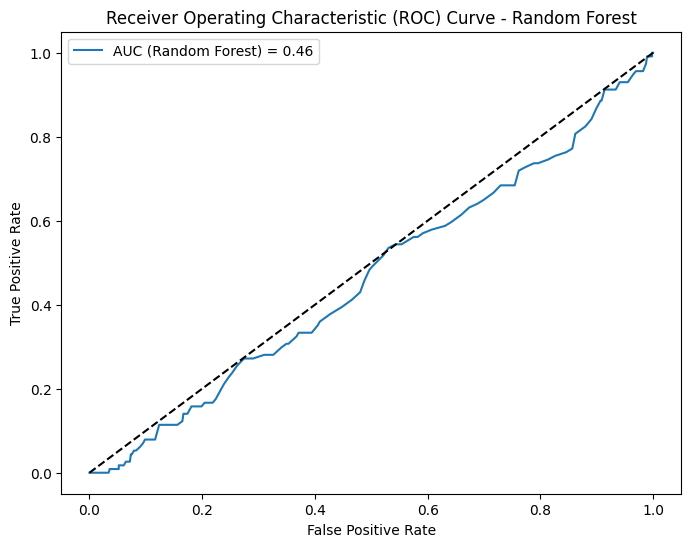

In [629]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define cross-validation strategy
cv_rf = 5  # Number of folds

# Hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='roc_auc', cv=cv_rf, n_jobs=-1)
grid_search_rf.fit(x_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters (Random Forest):", grid_search_rf.best_params_)

# Make predictions on the test data using the best Random Forest model
y_pred_prob_rf = grid_search_rf.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Calculate the AUC score for the best Random Forest model
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC Score for Best Model (Random Forest): {roc_auc_rf}")

# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(grid_search_rf.best_estimator_, x_resampled, y_resampled, cv=cv_rf, scoring='roc_auc')
print(f"Cross-Validation AUC Scores (Random Forest): {cv_scores_rf}")

# Training score for Random Forest
training_score_rf = grid_search_rf.best_estimator_.score(x_resampled, y_resampled)
print(f"Training Score for Best Model (Random Forest): {training_score_rf}")

# Testing score for Random Forest
testing_score_rf = grid_search_rf.best_estimator_.score(x_test, y_test)
print(f"Testing Score for Best Model (Random Forest): {testing_score_rf}")

# Make predictions on the test data using the best Random Forest model
y_pred_rf = grid_search_rf.best_estimator_.predict(x_test)

# Evaluate the best Random Forest model
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Plot the ROC curve for the best Random Forest model
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forest) = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

AUC Score (Gradient Boosting): 0.46178394013708113
Training Score (Gradient Boosting): 0.771838331160365
Testing Score (Gradient Boosting): 0.5803571428571429
Confusion Matrix (Gradient Boosting):
[[346 212]
 [ 70  44]]

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71       558
         1.0       0.17      0.39      0.24       114

    accuracy                           0.58       672
   macro avg       0.50      0.50      0.47       672
weighted avg       0.72      0.58      0.63       672



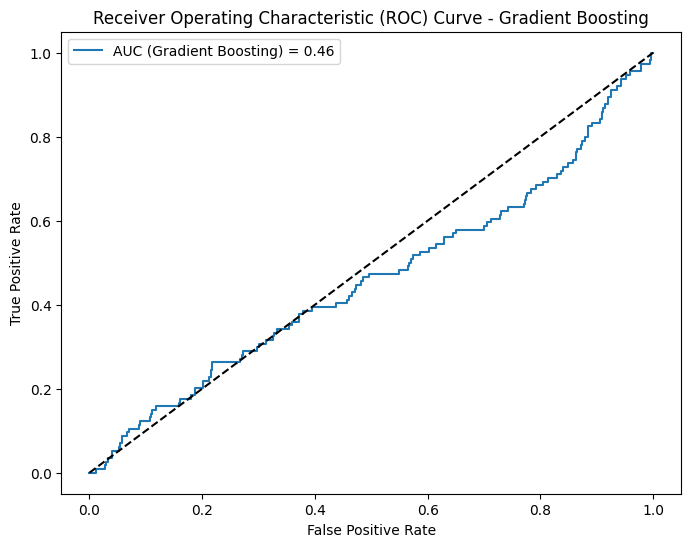

In [630]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the balanced training data
gb_model.fit(x_resampled, y_resampled)

# Make predictions on the test data
y_pred_prob_gb = gb_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)

# Calculate the AUC score
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print(f"AUC Score (Gradient Boosting): {roc_auc_gb}")

# Training score
training_score_gb = gb_model.score(x_resampled, y_resampled)
print(f"Training Score (Gradient Boosting): {training_score_gb}")

# Testing score
testing_score_gb = gb_model.score(x_test, y_test)
print(f"Testing Score (Gradient Boosting): {testing_score_gb}")

# Make predictions on the test data
y_pred_gb = gb_model.predict(x_test)

# Evaluate the Gradient Boosting model
print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# Plot the ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [631]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming x_resampled and y_resampled are the balanced training data from SMOTE
# x_test and y_test are the original test data

# Create a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define cross-validation strategy
cv_gb = 5  # Number of folds

# Hyperparameter tuning using GridSearchCV
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, scoring='roc_auc', cv=cv_gb, n_jobs=-1)
grid_search_gb.fit(x_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters (Gradient Boosting):", grid_search_gb.best_params_)

# Make predictions on the test data using the best Gradient Boosting model
y_pred_prob_gb = grid_search_gb.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)

# Calculate the AUC score for the best Gradient Boosting model
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print(f"AUC Score for Best Model (Gradient Boosting): {roc_auc_gb}")

# Cross-validation scores for Gradient Boosting
cv_scores_gb = cross_val_score(grid_search_gb.best_estimator_, x_resampled, y_resampled, cv=cv_gb, scoring='roc_auc')
print(f"Cross-Validation AUC Scores (Gradient Boosting): {cv_scores_gb}")

# Training score for Gradient Boosting
training_score_gb = grid_search_gb.best_estimator_.score(x_resampled, y_resampled)
print(f"Training Score for Best Model (Gradient Boosting): {training_score_gb}")

# Testing score for Gradient Boosting
testing_score_gb = grid_search_gb.best_estimator_.score(x_test, y_test)
print(f"Testing Score for Best Model (Gradient Boosting): {testing_score_gb}")

# Make predictions on the test data using the best Gradient Boosting model
y_pred_gb = grid_search_gb.best_estimator_.predict(x_test)

# Evaluate the best Gradient Boosting model
print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

# Plot the ROC curve for the best Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [486]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, and y_test are your training and testing sets
# Replace them with the actual names of your variables

# Create a Support Vector Machine Classifier
svm_classifier = SVC(random_state=3)

# Fit the model to the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(x_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8452380952380952
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       284
         1.0       0.00      0.00      0.00        52

    accuracy                           0.85       336
   macro avg       0.42      0.50      0.46       336
weighted avg       0.71      0.85      0.77       336



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [485]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming x_train, x_test, y_train, and y_test are your training and testing sets
# Replace them with the actual names of your variables

# Create a Support Vector Machine Classifier
svm_classifier = SVC(random_state=3)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the testing data
y_pred = grid_search.predict(x_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.8515215368616934
Accuracy: 0.8452380952380952
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       284
         1.0       0.00      0.00      0.00        52

    accuracy                           0.85       336
   macro avg       0.42      0.50      0.46       336
weighted avg       0.71      0.85      0.77       336



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4

In [487]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, and y_test are your training and testing sets
# Replace them with the actual names of your variables

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=3)

# Fit the model to the training data
dt_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(x_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.7380952380952381
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       284
         1.0       0.21      0.25      0.23        52

    accuracy                           0.74       336
   macro avg       0.53      0.54      0.54       336
weighted avg       0.76      0.74      0.75       336



In [488]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming x_train, x_test, y_train, and y_test are your training and testing sets
# Replace them with the actual names of your variables

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=3)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the testing data
y_pred = grid_search.predict(x_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.8151469541896995
Accuracy: 0.8065476190476191
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       284
         1.0       0.16      0.06      0.08        52

    accuracy                           0.81       336
   macro avg       0.50      0.50      0.49       336
weighted avg       0.74      0.81      0.77       336



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***